## <u>_CAPSTONE PROJECT_</u>

### `MARKETING CAMPAIGN/COUPON REDEMPTION`

In [1]:
#importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.options.display.max_rows=100
pd.options.display.max_columns=50
pd.options.display.max_colwidth=40
plt.rcParams['figure.figsize'] = [15,8]

### _READING DATA_

In [3]:
# Training Data
df_train=pd.read_csv('train.csv')
print('Before',df_train.shape)
df_train.drop_duplicates(inplace=True)
print('After ',df_train.shape)
print(df_train.columns)
print(df_train.isnull().sum())
print("=======================")
print(df_train.info())
df_train=df_train.drop(['id'],1)
df_train.head(3)

Before (78369, 5)
After  (78369, 5)
Index(['id', 'campaign_id', 'coupon_id', 'customer_id', 'redemption_status'], dtype='object')
id                   0
campaign_id          0
coupon_id            0
customer_id          0
redemption_status    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 78369 entries, 0 to 78368
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   id                 78369 non-null  int64
 1   campaign_id        78369 non-null  int64
 2   coupon_id          78369 non-null  int64
 3   customer_id        78369 non-null  int64
 4   redemption_status  78369 non-null  int64
dtypes: int64(5)
memory usage: 3.6 MB
None


,campaign_id,coupon_id,customer_id,redemption_status
0,13,27,1053,0
1,13,116,48,0
2,9,635,205,0


In [4]:
# Testing Data
df_test=pd.read_csv('test.csv')
print(df_test.shape)
print(df_test.columns)
print(df_test.isnull().sum())
print("=======================")
print(df_test.info())
df_test.head(3)

(50226, 4)
Index(['id', 'campaign_id', 'coupon_id', 'customer_id'], dtype='object')
id             0
campaign_id    0
coupon_id      0
customer_id    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50226 entries, 0 to 50225
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   id           50226 non-null  int64
 1   campaign_id  50226 non-null  int64
 2   coupon_id    50226 non-null  int64
 3   customer_id  50226 non-null  int64
dtypes: int64(4)
memory usage: 1.5 MB
None


,id,campaign_id,coupon_id,customer_id
0,3,22,869,967
1,4,20,389,1566
2,5,22,981,510


In [5]:
# Customer Transaction Data
df_trans=pd.read_csv('customer_transaction_data.csv')
print('Before',df_trans.shape)
df_trans.drop_duplicates(inplace=True)
print('After ',df_trans.shape)
print(df_trans.columns)
print(df_trans.isnull().sum())
print("=======================")
print(df_trans.info())
#df_trans=df_trans.drop(['date'],1)
df_trans.head(3)

Before (1324566, 7)
After  (1321650, 7)
Index(['date', 'customer_id', 'item_id', 'quantity', 'selling_price',
       'other_discount', 'coupon_discount'],
      dtype='object')
date               0
customer_id        0
item_id            0
quantity           0
selling_price      0
other_discount     0
coupon_discount    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1321650 entries, 0 to 1324565
Data columns (total 7 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   date             1321650 non-null  object 
 1   customer_id      1321650 non-null  int64  
 2   item_id          1321650 non-null  int64  
 3   quantity         1321650 non-null  int64  
 4   selling_price    1321650 non-null  float64
 5   other_discount   1321650 non-null  float64
 6   coupon_discount  1321650 non-null  float64
dtypes: float64(3), int64(3), object(1)
memory usage: 80.7+ MB
None


,date,customer_id,item_id,quantity,selling_price,other_discount,coupon_discount
0,2012-01-02,1501,26830,1,35.26,-10.69,0.0
1,2012-01-02,1501,54253,1,53.43,-13.89,0.0
2,2012-01-02,1501,31962,1,106.50,-14.25,0.0


In [6]:
# Customer Demographics Data
df_demo=pd.read_csv('customer_demographics.csv')
print('Before',df_demo.shape)
df_demo.drop_duplicates(inplace=True)
print('After ',df_demo.shape)
print(df_demo.columns)
print(df_demo.isnull().sum())
print("=======================")
print(df_demo.info())
df_demo=df_demo[['customer_id','age_range','income_bracket']]
df_demo.head(3)

Before (760, 7)
After  (760, 7)
Index(['customer_id', 'age_range', 'marital_status', 'rented', 'family_size',
       'no_of_children', 'income_bracket'],
      dtype='object')
customer_id         0
age_range           0
marital_status    329
rented              0
family_size         0
no_of_children    538
income_bracket      0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 760 entries, 0 to 759
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     760 non-null    int64 
 1   age_range       760 non-null    object
 2   marital_status  431 non-null    object
 3   rented          760 non-null    int64 
 4   family_size     760 non-null    object
 5   no_of_children  222 non-null    object
 6   income_bracket  760 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 47.5+ KB
None


,customer_id,age_range,income_bracket
0,1,70+,4
1,6,46-55,5
2,7,26-35,3


In [7]:
# Campaign Data
df_camp=pd.read_csv('campaign_data.csv')
print('Before',df_camp.shape)
df_camp.drop_duplicates(inplace=True)
print('After ',df_camp.shape)
print(df_camp.columns)
print(df_camp.isnull().sum())
print("=======================")
print(df_camp.info())
print(df_camp.head())
def Change_to_datetime(date_col):
    new_datetype = []
    for i, date in enumerate(date_col):
        date_format = "%d/%m/%Y" 
    
        date= date[:-2]+'20'+date[-2:]#change the string format to the format convirtable to datetype object
        date= pd.datetime.strptime(date, date_format)
        new_datetype.append(date)
        
    new_datetype = pd.Series(new_datetype)
    return new_datetype

df_camp['start_date']= Change_to_datetime(df_camp.start_date)
df_camp['end_date']= Change_to_datetime(df_camp.end_date)
df_camp['duration']= df_camp.end_date-df_camp.start_date
df_camp['duration']=df_camp.duration.apply(lambda x : x.days)
df_camp=df_camp[['campaign_id','campaign_type','duration']]
df_camp.head(3)

Before (28, 4)
After  (28, 4)
Index(['campaign_id', 'campaign_type', 'start_date', 'end_date'], dtype='object')
campaign_id      0
campaign_type    0
start_date       0
end_date         0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 28 entries, 0 to 27
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   campaign_id    28 non-null     int64 
 1   campaign_type  28 non-null     object
 2   start_date     28 non-null     object
 3   end_date       28 non-null     object
dtypes: int64(1), object(3)
memory usage: 1.1+ KB
None
   campaign_id campaign_type start_date  end_date
0           24             Y   21/10/13  20/12/13
1           25             Y   21/10/13  22/11/13
2           20             Y   07/09/13  16/11/13
3           23             Y   08/10/13  15/11/13
4           21             Y   16/09/13  18/10/13


,campaign_id,campaign_type,duration
0,24,Y,60
1,25,Y,32
2,20,Y,70


In [8]:
# Coupon Item Mapping Data
df_coup_map=pd.read_csv('coupon_item_mapping.csv')
print('Before',df_coup_map.shape)
df_coup_map.drop_duplicates(inplace=True)
print('After ',df_coup_map.shape)
print(df_coup_map.columns)
print(df_coup_map.isnull().sum())
print("=======================")
print(df_coup_map.info())
df_coup_map.head(3)

Before (92663, 2)
After  (92663, 2)
Index(['coupon_id', 'item_id'], dtype='object')
coupon_id    0
item_id      0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 92663 entries, 0 to 92662
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   coupon_id  92663 non-null  int64
 1   item_id    92663 non-null  int64
dtypes: int64(2)
memory usage: 2.1 MB
None


,coupon_id,item_id
0,105,37
1,107,75
2,494,76


In [9]:
# Items data
df_item=pd.read_csv('item_data.csv')
print('Before',df_item.shape)
df_item.drop_duplicates(inplace=True)
print('After ',df_item.shape)
print(df_item.columns)
print(df_item.isnull().sum())
print("=======================")
print(df_item.info())
df_item.head(3)

Before (74066, 4)
After  (74066, 4)
Index(['item_id', 'brand', 'brand_type', 'category'], dtype='object')
item_id       0
brand         0
brand_type    0
category      0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 74066 entries, 0 to 74065
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   item_id     74066 non-null  int64 
 1   brand       74066 non-null  int64 
 2   brand_type  74066 non-null  object
 3   category    74066 non-null  object
dtypes: int64(2), object(2)
memory usage: 2.8+ MB
None


,item_id,brand,brand_type,category
0,1,1,Established,Grocery
1,2,1,Established,Miscellaneous
2,3,56,Local,Bakery


# **<u>_Data Preparation_ and  _Merging_<u/>**

- **AGGREGATE_TRANSACTION_DATA**

In [10]:
df_trans['year']= pd.to_datetime(df_trans.date,format='%Y/%m/%d').dt.year
df_trans['month']= pd.to_datetime(df_trans.date,format='%Y/%m/%d').dt.month
df_trans['day']= pd.to_datetime(df_trans.date,format='%Y/%m/%d').dt.day

In [11]:
# to known transaction count for each item, first adding 1 for each transaction done  
# to know weather the customer used any coupon , creating a new column whenever there is coupon discount with 1 
df_trans['Trans_count']=1
df_trans['coupon_count']=df_trans.coupon_discount.apply(lambda x :0 if x==0 else 1)

In [12]:
print(df_trans.shape)
df_trans.head(3)

(1321650, 12)


,date,customer_id,item_id,quantity,selling_price,other_discount,coupon_discount,year,month,day,Trans_count,coupon_count
0,2012-01-02,1501,26830,1,35.26,-10.69,0.0,2012,1,2,1,0
1,2012-01-02,1501,54253,1,53.43,-13.89,0.0,2012,1,2,1,0
2,2012-01-02,1501,31962,1,106.50,-14.25,0.0,2012,1,2,1,0


In [13]:
# From the Customer transaction data, Creating New Features (for items)
agg_trans= pd.pivot_table(df_trans, index = 'item_id',
                                    values = ['customer_id','quantity','selling_price','other_discount',
                                              'coupon_discount','Trans_count','coupon_count'],
                                    aggfunc={'customer_id':lambda x:len(set(x)),
                                             'quantity':np.mean,
                                             'selling_price':np.mean,
                                             'other_discount':np.mean,
                                             'coupon_discount':np.mean,
                                             'Trans_count':np.sum,
                                             'coupon_count':np.sum})

In [14]:
# updating Column names as the data is changed above using aggfunc in pivot_table
columns_upd = {'customer_id':'customer_count','quantity':'avg_order_quantity',
            'selling_price':'avg_price','other_discount':'avg_oth_dis',
            'coupon_discount':'avg_coup_dis','Trans_count':'Trans_count','coupon_count':'sum_coup_count'}
agg_trans.rename(columns=columns_upd, inplace = True)
print(agg_trans.shape)
agg_trans.head(2)

(74063, 7)


,Trans_count,sum_coup_count,avg_coup_dis,customer_count,avg_oth_dis,avg_order_quantity,avg_price
item_id,,,,,,,
1,2,0,0.0,2,0.0,1.0,124.31
2,1,0,0.0,1,0.0,1.0,35.26


In [15]:
# to know sum of coupon discout per item (avg coupon discont  per item * count of transaction)
agg_trans['sum_coup_dis'] = agg_trans['avg_coup_dis']*agg_trans['Trans_count']

# to know sum of other discout per item (avg other discont  per item * count of transaction)
agg_trans['sum_oth_dis'] = agg_trans['avg_oth_dis']*agg_trans['Trans_count']

# to know sum of order quantity per item (avg order quantity discont item per item * count of transaction)
agg_trans['sum_order_quantity']= agg_trans['avg_order_quantity']*agg_trans['Trans_count']

# to know sum of total coupon discout per item (avg coupon discont item per item * count of transaction)
agg_trans['sum_total_dis'] = agg_trans['sum_coup_dis'] +agg_trans['Trans_count']

# to know avg total discout per item (avg coupon discont item per item * count of transaction)
agg_trans['avg_total_dis'] = agg_trans['avg_coup_dis'] +agg_trans['Trans_count']

agg_trans.head()

,Trans_count,sum_coup_count,avg_coup_dis,customer_count,avg_oth_dis,avg_order_quantity,avg_price,sum_coup_dis,sum_oth_dis,sum_order_quantity,sum_total_dis,avg_total_dis
item_id,,,,,,,,,,,,
1,2,0,0.0,2,0.0,1.0,124.31,0.0,0.0,2.0,2.0,2.0
2,1,0,0.0,1,0.0,1.0,35.26,0.0,0.0,1.0,1.0,1.0
3,1,0,0.0,1,0.0,1.0,56.64,0.0,0.0,1.0,1.0,1.0
4,1,0,0.0,1,0.0,1.0,54.85,0.0,0.0,1.0,1.0,1.0
5,1,0,0.0,1,0.0,1.0,81.57,0.0,0.0,1.0,1.0,1.0


- Merging-- **Coupon_item_mapping/item_data**
- Merging-- **agg_trans/coup_item_map_item_data**

In [16]:
#merging items and coupon data 
coup_itm_map_itm_data=pd.merge(df_coup_map,df_item,on='item_id')
coup_itm_map_itm_data.drop_duplicates(keep='first',inplace=True)

# merging agg_transaction data with merged items coupon data
agg_trans_item_coup=pd.merge(agg_trans,coup_itm_map_itm_data,on='item_id',how='left')
print(agg_trans_item_coup.shape)

agg_trans_item_coup.head()

(130432, 17)


,item_id,Trans_count,sum_coup_count,avg_coup_dis,customer_count,avg_oth_dis,avg_order_quantity,avg_price,sum_coup_dis,sum_oth_dis,sum_order_quantity,sum_total_dis,avg_total_dis,coupon_id,brand,brand_type,category
0,1,2,0,0.0,2,0.0,1.0,124.31,0.0,0.0,2.0,2.0,2.0,22.0,1.0,Established,Grocery
1,1,2,0,0.0,2,0.0,1.0,124.31,0.0,0.0,2.0,2.0,2.0,31.0,1.0,Established,Grocery
2,2,1,0,0.0,1,0.0,1.0,35.26,0.0,0.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN
3,3,1,0,0.0,1,0.0,1.0,56.64,0.0,0.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN
4,4,1,0,0.0,1,0.0,1.0,54.85,0.0,0.0,1.0,1.0,1.0,166.0,56.0,Local,Grocery


In [17]:
agg_trans_item_coup.drop(['brand_type','category'],1,inplace=True)

In [18]:
# Aggregating the data with respective to Coupon_id
agg_trans_coup = pd.pivot_table(agg_trans_item_coup, index ='coupon_id',
                                             values=['item_id', 'Trans_count', 'sum_coup_count', 'avg_coup_dis',
                                                     'customer_count', 'avg_oth_dis', 'avg_order_quantity', 'avg_price',
                                                     'sum_coup_dis', 'sum_oth_dis', 'sum_order_quantity',
                                                     'sum_total_dis', 'avg_total_dis', 'brand'],
                                            aggfunc={'item_id':lambda x: len(set(x)),
                                                     'Trans_count':np.sum,
                                                     'sum_coup_count':np.sum,
                                                     'avg_coup_dis':np.mean,
                                                     'customer_count':np.sum,
                                                     'avg_oth_dis':np.mean,
                                                     'avg_order_quantity':np.mean,
                                                     'avg_price':np.mean,
                                                     'sum_coup_dis':np.sum,
                                                     'sum_oth_dis':np.sum,
                                                     'sum_order_quantity':np.sum,
                                                     'sum_total_dis':np.sum,
                                                     'avg_total_dis':np.mean,
                                                     'brand':lambda x: len(set(x))})
cols_upd= { 'item_id': 'count_items',
            'brand': 'count_brands'}
agg_trans_coup.rename(columns = cols_upd, inplace = True)
agg_trans_coup.head()

,Trans_count,avg_coup_dis,avg_order_quantity,avg_oth_dis,avg_price,avg_total_dis,count_brands,customer_count,count_items,sum_coup_count,sum_coup_dis,sum_order_quantity,sum_oth_dis,sum_total_dis
coupon_id,,,,,,,,,,,,,,
1.0,815,-1.119234,1.219646,-25.164793,99.895197,19.778202,3,577,39,25,-1095.31,1018.0,-24115.03,-280.31
2.0,81,0.000000,1.137500,-23.314062,114.354437,40.500000,1,30,2,0,0.00,103.0,-1478.75,81.00
3.0,211,-2.667646,1.121632,-17.613717,129.926106,9.744119,2,146,17,14,-543.19,247.0,-4952.62,-332.19
4.0,676,-1.485152,1.020872,-37.411408,178.722897,26.681515,1,536,24,44,-881.59,702.0,-26804.05,-205.59
5.0,44,0.000000,1.000000,-27.265786,376.704214,6.285714,1,42,7,0,0.00,44.0,-1228.88,44.00


- Merging -- **Train_data/agg_trans_coup**

In [19]:
# merging train data with item coupons transaction data 
df_train_agg_trans=pd.merge(df_train,agg_trans_coup,on='coupon_id',how='left')
print(df_train_agg_trans.shape)
df_train_agg_trans.head(3)

(78369, 18)


,campaign_id,coupon_id,customer_id,redemption_status,Trans_count,avg_coup_dis,avg_order_quantity,avg_oth_dis,avg_price,avg_total_dis,count_brands,customer_count,count_items,sum_coup_count,sum_coup_dis,sum_order_quantity,sum_oth_dis,sum_total_dis
0,13,27,1053,0,3701,-1.233750,1.169862,-51.747677,84.487938,28.374250,2,2403,125,185,-5221.70,4647.0,-225018.39,-1520.70
1,13,116,48,0,75,0.000000,1.050926,-10.661343,63.833519,25.000000,1,61,3,0,0.00,86.0,-684.27,75.00
2,9,635,205,0,142,-2.987321,1.353802,-142.498493,332.128380,-0.867918,1,118,67,15,-605.54,202.0,-23566.35,-463.54


In [20]:
# Aggregating the customer_transaction data with respective to Customer_id 
trans1= pd.pivot_table(df_trans, index = 'customer_id',
                                 values =['item_id', 'quantity', 'selling_price','other_discount',
                                          'coupon_discount','Trans_count','coupon_count'],
                                aggfunc={'item_id':len, 
                                         'quantity':np.mean,
                                         'selling_price':np.mean,
                                         'other_discount':np.mean,
                                         'coupon_discount':np.mean,
                                         'coupon_count':np.mean})
new_cols={'item_id':'count_items_cust',
          'quantity':'avg_quantity_cust',
          'selling_price':'avg_price_cust',
          'other_discount':'avg_oth_disc_cust',
          'coupon_discount':'avg_coup_disc_cust',
          'coupon_count':'avg_coup_count_cust'}
trans1.rename(columns=new_cols, inplace= True)

In [21]:
trans1['sum_quantity_cust']=trans1['count_items_cust']*trans1['avg_quantity_cust']
trans1['sum_price_cust']=trans1['count_items_cust']*trans1['avg_price_cust']
trans1['sum_oth_disc_cust']=trans1['count_items_cust']*trans1['avg_oth_disc_cust']
trans1['sum_coupp_disc_cust']=trans1['count_items_cust']*trans1['avg_coup_disc_cust']
trans1['count_coup_used_cust']=trans1['count_items_cust']*trans1['avg_coup_count_cust']

In [22]:
print(trans1.shape)
trans1.head()

(1582, 11)


,avg_coup_count_cust,avg_coup_disc_cust,count_items_cust,avg_oth_disc_cust,avg_quantity_cust,avg_price_cust,sum_quantity_cust,sum_price_cust,sum_oth_disc_cust,sum_coupp_disc_cust,count_coup_used_cust
customer_id,,,,,,,,,,,
1,0.072658,-1.955631,1046,-16.159207,1.170172,93.848537,1224.0,98165.57,-16902.53,-2045.59,76.0
2,0.009547,-0.595084,419,-16.830430,1.131265,102.864033,474.0,43100.03,-7051.95,-249.34,4.0
3,0.075177,-3.091546,705,-22.714227,11.578723,103.617404,8163.0,73050.27,-16013.53,-2179.54,53.0
4,0.004545,-0.404773,220,-13.305409,1.272727,154.423727,280.0,33973.22,-2927.19,-89.05,1.0
5,0.002525,-0.114684,792,-13.657917,117.869949,130.827146,93353.0,103615.10,-10817.07,-90.83,2.0


- Merging -- **Customer_transaction/Customer_demographic_data**
- Merging -- **Transaction_Demographic/Train_agg_trans**

In [23]:
# merging new transaction data with customer demographic data 
trans_demog=pd.merge(trans1,df_demo,on='customer_id',how='left')

# merging transaction demographic data with train item coupon aggregate transaction data 
final_tr=pd.merge(df_train_agg_trans,trans_demog,on='customer_id',how='left')

print(final_tr.shape)
final_tr.head()

(78369, 31)


,campaign_id,coupon_id,customer_id,redemption_status,Trans_count,avg_coup_dis,avg_order_quantity,avg_oth_dis,avg_price,avg_total_dis,count_brands,customer_count,count_items,sum_coup_count,sum_coup_dis,sum_order_quantity,sum_oth_dis,sum_total_dis,avg_coup_count_cust,avg_coup_disc_cust,count_items_cust,avg_oth_disc_cust,avg_quantity_cust,avg_price_cust,sum_quantity_cust,sum_price_cust,sum_oth_disc_cust,sum_coupp_disc_cust,count_coup_used_cust,age_range,income_bracket
0,13,27,1053,0,3701,-1.233750,1.169862,-51.747677,84.487938,28.374250,2,2403,125,185,-5221.70,4647.0,-225018.39,-1520.70,0.003226,-0.287258,310,-33.168935,340.487097,184.260484,105551.0,57120.75,-10282.37,-89.05,1.0,46-55,5.0
1,13,116,48,0,75,0.000000,1.050926,-10.661343,63.833519,25.000000,1,61,3,0,0.00,86.0,-684.27,75.00,0.031250,-3.223411,384,-27.577422,31.619792,234.625130,12142.0,90096.05,-10589.73,-1237.79,12.0,36-45,3.0
2,9,635,205,0,142,-2.987321,1.353802,-142.498493,332.128380,-0.867918,1,118,67,15,-605.54,202.0,-23566.35,-463.54,0.086687,-2.168421,969,-17.769174,1.392157,121.007730,1349.0,117256.49,-17218.33,-2101.20,84.0,46-55,7.0
3,13,644,1050,0,39,-4.452500,1.110390,-5.010601,94.261640,5.297500,1,14,4,1,-17.81,47.0,-309.91,21.19,0.008439,-0.751477,237,-16.655570,1.291139,98.276034,306.0,23291.42,-3947.37,-178.10,2.0,NaN,NaN
4,8,1017,1489,0,1414,-0.155422,1.070599,-33.614815,181.585793,44.032078,1,874,32,19,-427.44,1601.0,-54635.14,986.56,0.017794,-0.471548,562,-20.524733,247.443060,120.636103,139063.0,67797.49,-11534.90,-265.01,10.0,46-55,3.0


- Merging-- **All the previous merged data/Campaign_data**

In [24]:
# merging train item coupon agg transaction customer demographic data with campaign data
final_df=pd.merge(final_tr,df_camp,on='campaign_id',how='left')

print(final_df.shape)
final_df.head()

(78369, 33)


,campaign_id,coupon_id,customer_id,redemption_status,Trans_count,avg_coup_dis,avg_order_quantity,avg_oth_dis,avg_price,avg_total_dis,count_brands,customer_count,count_items,sum_coup_count,sum_coup_dis,sum_order_quantity,sum_oth_dis,sum_total_dis,avg_coup_count_cust,avg_coup_disc_cust,count_items_cust,avg_oth_disc_cust,avg_quantity_cust,avg_price_cust,sum_quantity_cust,sum_price_cust,sum_oth_disc_cust,sum_coupp_disc_cust,count_coup_used_cust,age_range,income_bracket,campaign_type,duration
0,13,27,1053,0,3701,-1.233750,1.169862,-51.747677,84.487938,28.374250,2,2403,125,185,-5221.70,4647.0,-225018.39,-1520.70,0.003226,-0.287258,310,-33.168935,340.487097,184.260484,105551.0,57120.75,-10282.37,-89.05,1.0,46-55,5.0,X,47
1,13,116,48,0,75,0.000000,1.050926,-10.661343,63.833519,25.000000,1,61,3,0,0.00,86.0,-684.27,75.00,0.031250,-3.223411,384,-27.577422,31.619792,234.625130,12142.0,90096.05,-10589.73,-1237.79,12.0,36-45,3.0,X,47
2,9,635,205,0,142,-2.987321,1.353802,-142.498493,332.128380,-0.867918,1,118,67,15,-605.54,202.0,-23566.35,-463.54,0.086687,-2.168421,969,-17.769174,1.392157,121.007730,1349.0,117256.49,-17218.33,-2101.20,84.0,46-55,7.0,Y,32
3,13,644,1050,0,39,-4.452500,1.110390,-5.010601,94.261640,5.297500,1,14,4,1,-17.81,47.0,-309.91,21.19,0.008439,-0.751477,237,-16.655570,1.291139,98.276034,306.0,23291.42,-3947.37,-178.10,2.0,NaN,NaN,X,47
4,8,1017,1489,0,1414,-0.155422,1.070599,-33.614815,181.585793,44.032078,1,874,32,19,-427.44,1601.0,-54635.14,986.56,0.017794,-0.471548,562,-20.524733,247.443060,120.636103,139063.0,67797.49,-11534.90,-265.01,10.0,46-55,3.0,X,48


In [25]:
# NUll Value_treatment
count=pd.Series(final_df.isnull().sum())
per=pd.Series(round((final_df.isnull().sum()/len(final_df))*100,2))
null=pd.concat([count,per],1)
null

,0,1
campaign_id,0,0.00
coupon_id,0,0.00
customer_id,0,0.00
redemption_status,0,0.00
Trans_count,0,0.00
avg_coup_dis,0,0.00
avg_order_quantity,0,0.00
avg_oth_dis,0,0.00
avg_price,0,0.00
avg_total_dis,0,0.00


In [26]:
final_df.dtypes

campaign_id               int64
coupon_id                 int64
customer_id               int64
redemption_status         int64
Trans_count               int64
avg_coup_dis            float64
avg_order_quantity      float64
avg_oth_dis             float64
avg_price               float64
avg_total_dis           float64
count_brands              int64
customer_count            int64
count_items               int64
sum_coup_count            int64
sum_coup_dis            float64
sum_order_quantity      float64
sum_oth_dis             float64
sum_total_dis           float64
avg_coup_count_cust     float64
avg_coup_disc_cust      float64
count_items_cust          int64
avg_oth_disc_cust       float64
avg_quantity_cust       float64
avg_price_cust          float64
sum_quantity_cust       float64
sum_price_cust          float64
sum_oth_disc_cust       float64
sum_coupp_disc_cust     float64
count_coup_used_cust    float64
age_range                object
income_bracket          float64
campaign

In [27]:
print(final_df.income_bracket.mean())
final_df.fillna({'income_bracket':5.0},inplace=True)

final_df['income_bracket'].value_counts()

4.802478184191842


5.0     45745
4.0      8753
6.0      4855
2.0      3892
3.0      3882
1.0      3456
8.0      2369
9.0      2019
7.0      1829
12.0      796
10.0      513
11.0      260
Name: income_bracket, dtype: int64

In [28]:
print(final_df.age_range.value_counts())
final_df['age_range']=final_df['age_range'].map({'18-25':'Young Aged',
                                                 '26-35':'Young Aged',
                                                 '36-45':'Middle Aged',
                                                 '46-55':'Middle Aged',
                                                '56-70':'Old Aged',
                                                '70+':'Old Aged',
                                                })
print(final_df['age_range'].value_counts()/len(final_df)*100)
df_sample=final_df.dropna()
print(df_sample['age_range'].value_counts()/len(df_sample)*100)
final_df['age_range'] =final_df['age_range'].fillna(pd.Series(np.random.choice(['Middle Aged','Young Aged','Old Aged'],
                                  p=[0.60,0.24,0.16], size=len(final_df))))
print(final_df['age_range'].value_counts()/len(final_df)*100)
final_df.age_range=final_df.age_range.map({'Middle Aged':1, 'Old Aged':2, 'Young Aged':3})
final_df.isnull().sum()

46-55    15154
36-45    11210
26-35     8024
56-70     3723
70+       3094
18-25     2456
Name: age_range, dtype: int64
Middle Aged    33.640853
Young Aged     13.372635
Old Aged        8.698593
Name: age_range, dtype: float64
Middle Aged    60.383409
Young Aged     24.003115
Old Aged       15.613477
Name: age_range, dtype: float64
Middle Aged    60.264901
Young Aged     24.009494
Old Aged       15.725606
Name: age_range, dtype: float64


campaign_id             0
coupon_id               0
customer_id             0
redemption_status       0
Trans_count             0
avg_coup_dis            0
avg_order_quantity      0
avg_oth_dis             0
avg_price               0
avg_total_dis           0
count_brands            0
customer_count          0
count_items             0
sum_coup_count          0
sum_coup_dis            0
sum_order_quantity      0
sum_oth_dis             0
sum_total_dis           0
avg_coup_count_cust     0
avg_coup_disc_cust      0
count_items_cust        0
avg_oth_disc_cust       0
avg_quantity_cust       0
avg_price_cust          0
sum_quantity_cust       0
sum_price_cust          0
sum_oth_disc_cust       0
sum_coupp_disc_cust     0
count_coup_used_cust    0
age_range               0
income_bracket          0
campaign_type           0
duration                0
dtype: int64

In [29]:
final_df.head()

,campaign_id,coupon_id,customer_id,redemption_status,Trans_count,avg_coup_dis,avg_order_quantity,avg_oth_dis,avg_price,avg_total_dis,count_brands,customer_count,count_items,sum_coup_count,sum_coup_dis,sum_order_quantity,sum_oth_dis,sum_total_dis,avg_coup_count_cust,avg_coup_disc_cust,count_items_cust,avg_oth_disc_cust,avg_quantity_cust,avg_price_cust,sum_quantity_cust,sum_price_cust,sum_oth_disc_cust,sum_coupp_disc_cust,count_coup_used_cust,age_range,income_bracket,campaign_type,duration
0,13,27,1053,0,3701,-1.233750,1.169862,-51.747677,84.487938,28.374250,2,2403,125,185,-5221.70,4647.0,-225018.39,-1520.70,0.003226,-0.287258,310,-33.168935,340.487097,184.260484,105551.0,57120.75,-10282.37,-89.05,1.0,1,5.0,X,47
1,13,116,48,0,75,0.000000,1.050926,-10.661343,63.833519,25.000000,1,61,3,0,0.00,86.0,-684.27,75.00,0.031250,-3.223411,384,-27.577422,31.619792,234.625130,12142.0,90096.05,-10589.73,-1237.79,12.0,1,3.0,X,47
2,9,635,205,0,142,-2.987321,1.353802,-142.498493,332.128380,-0.867918,1,118,67,15,-605.54,202.0,-23566.35,-463.54,0.086687,-2.168421,969,-17.769174,1.392157,121.007730,1349.0,117256.49,-17218.33,-2101.20,84.0,1,7.0,Y,32
3,13,644,1050,0,39,-4.452500,1.110390,-5.010601,94.261640,5.297500,1,14,4,1,-17.81,47.0,-309.91,21.19,0.008439,-0.751477,237,-16.655570,1.291139,98.276034,306.0,23291.42,-3947.37,-178.10,2.0,3,5.0,X,47
4,8,1017,1489,0,1414,-0.155422,1.070599,-33.614815,181.585793,44.032078,1,874,32,19,-427.44,1601.0,-54635.14,986.56,0.017794,-0.471548,562,-20.524733,247.443060,120.636103,139063.0,67797.49,-11534.90,-265.01,10.0,1,3.0,X,48


## ANALYSIS

In [30]:
df=final_df.copy()
df.head()

,campaign_id,coupon_id,customer_id,redemption_status,Trans_count,avg_coup_dis,avg_order_quantity,avg_oth_dis,avg_price,avg_total_dis,count_brands,customer_count,count_items,sum_coup_count,sum_coup_dis,sum_order_quantity,sum_oth_dis,sum_total_dis,avg_coup_count_cust,avg_coup_disc_cust,count_items_cust,avg_oth_disc_cust,avg_quantity_cust,avg_price_cust,sum_quantity_cust,sum_price_cust,sum_oth_disc_cust,sum_coupp_disc_cust,count_coup_used_cust,age_range,income_bracket,campaign_type,duration
0,13,27,1053,0,3701,-1.233750,1.169862,-51.747677,84.487938,28.374250,2,2403,125,185,-5221.70,4647.0,-225018.39,-1520.70,0.003226,-0.287258,310,-33.168935,340.487097,184.260484,105551.0,57120.75,-10282.37,-89.05,1.0,1,5.0,X,47
1,13,116,48,0,75,0.000000,1.050926,-10.661343,63.833519,25.000000,1,61,3,0,0.00,86.0,-684.27,75.00,0.031250,-3.223411,384,-27.577422,31.619792,234.625130,12142.0,90096.05,-10589.73,-1237.79,12.0,1,3.0,X,47
2,9,635,205,0,142,-2.987321,1.353802,-142.498493,332.128380,-0.867918,1,118,67,15,-605.54,202.0,-23566.35,-463.54,0.086687,-2.168421,969,-17.769174,1.392157,121.007730,1349.0,117256.49,-17218.33,-2101.20,84.0,1,7.0,Y,32
3,13,644,1050,0,39,-4.452500,1.110390,-5.010601,94.261640,5.297500,1,14,4,1,-17.81,47.0,-309.91,21.19,0.008439,-0.751477,237,-16.655570,1.291139,98.276034,306.0,23291.42,-3947.37,-178.10,2.0,3,5.0,X,47
4,8,1017,1489,0,1414,-0.155422,1.070599,-33.614815,181.585793,44.032078,1,874,32,19,-427.44,1601.0,-54635.14,986.56,0.017794,-0.471548,562,-20.524733,247.443060,120.636103,139063.0,67797.49,-11534.90,-265.01,10.0,1,3.0,X,48


0    77640
1      729
Name: redemption_status, dtype: int64


<AxesSubplot:>

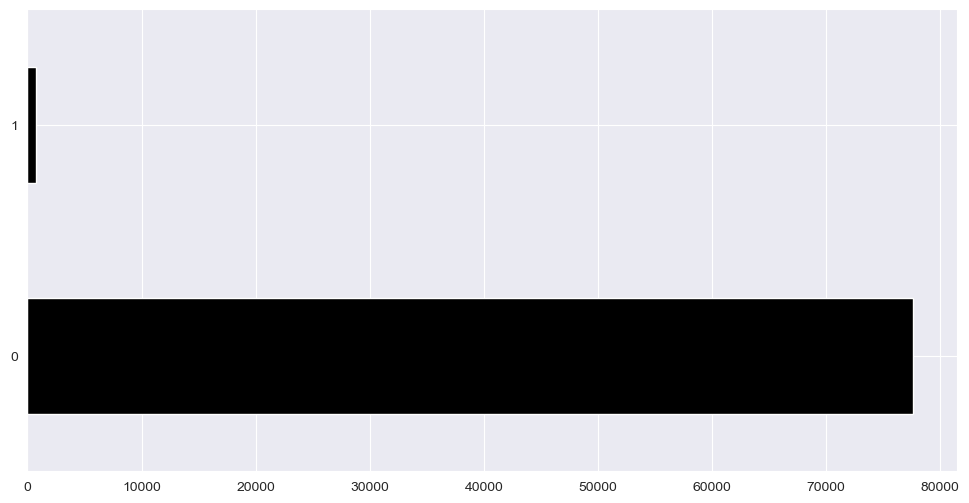

In [31]:
plt.figure(figsize=(12,6))
print(df.redemption_status.value_counts())
df.redemption_status.value_counts().plot.barh(color='black')
# we can clearly see there is imbalance in the redemption_status variable. 

In [32]:
# changing income brackets into 3 major categories
# 20% and below -- lower income 
# 20% to 40% -- lower middle income 
# 40% to 60% -- upper middle income 
# above 60% -- upper income 
print(df.income_bracket.value_counts())
df.head()

5.0     45745
4.0      8753
6.0      4855
2.0      3892
3.0      3882
1.0      3456
8.0      2369
9.0      2019
7.0      1829
12.0      796
10.0      513
11.0      260
Name: income_bracket, dtype: int64


,campaign_id,coupon_id,customer_id,redemption_status,Trans_count,avg_coup_dis,avg_order_quantity,avg_oth_dis,avg_price,avg_total_dis,count_brands,customer_count,count_items,sum_coup_count,sum_coup_dis,sum_order_quantity,sum_oth_dis,sum_total_dis,avg_coup_count_cust,avg_coup_disc_cust,count_items_cust,avg_oth_disc_cust,avg_quantity_cust,avg_price_cust,sum_quantity_cust,sum_price_cust,sum_oth_disc_cust,sum_coupp_disc_cust,count_coup_used_cust,age_range,income_bracket,campaign_type,duration
0,13,27,1053,0,3701,-1.233750,1.169862,-51.747677,84.487938,28.374250,2,2403,125,185,-5221.70,4647.0,-225018.39,-1520.70,0.003226,-0.287258,310,-33.168935,340.487097,184.260484,105551.0,57120.75,-10282.37,-89.05,1.0,1,5.0,X,47
1,13,116,48,0,75,0.000000,1.050926,-10.661343,63.833519,25.000000,1,61,3,0,0.00,86.0,-684.27,75.00,0.031250,-3.223411,384,-27.577422,31.619792,234.625130,12142.0,90096.05,-10589.73,-1237.79,12.0,1,3.0,X,47
2,9,635,205,0,142,-2.987321,1.353802,-142.498493,332.128380,-0.867918,1,118,67,15,-605.54,202.0,-23566.35,-463.54,0.086687,-2.168421,969,-17.769174,1.392157,121.007730,1349.0,117256.49,-17218.33,-2101.20,84.0,1,7.0,Y,32
3,13,644,1050,0,39,-4.452500,1.110390,-5.010601,94.261640,5.297500,1,14,4,1,-17.81,47.0,-309.91,21.19,0.008439,-0.751477,237,-16.655570,1.291139,98.276034,306.0,23291.42,-3947.37,-178.10,2.0,3,5.0,X,47
4,8,1017,1489,0,1414,-0.155422,1.070599,-33.614815,181.585793,44.032078,1,874,32,19,-427.44,1601.0,-54635.14,986.56,0.017794,-0.471548,562,-20.524733,247.443060,120.636103,139063.0,67797.49,-11534.90,-265.01,10.0,1,3.0,X,48


In [33]:
def cat_income_bracket(income_bracket):
    if int(income_bracket) <= 3:
        return 'lower'
    elif int(income_bracket) <= 5:
        return 'lower middle'
    elif int(income_bracket) <= 8:
        return 'upper middle'
    else:
        return 'upper'
    
df.income_bracket=df.income_bracket.apply(cat_income_bracket)
df.head(10)

,campaign_id,coupon_id,customer_id,redemption_status,Trans_count,avg_coup_dis,avg_order_quantity,avg_oth_dis,avg_price,avg_total_dis,count_brands,customer_count,count_items,sum_coup_count,sum_coup_dis,sum_order_quantity,sum_oth_dis,sum_total_dis,avg_coup_count_cust,avg_coup_disc_cust,count_items_cust,avg_oth_disc_cust,avg_quantity_cust,avg_price_cust,sum_quantity_cust,sum_price_cust,sum_oth_disc_cust,sum_coupp_disc_cust,count_coup_used_cust,age_range,income_bracket,campaign_type,duration
0,13,27,1053,0,3701,-1.233750,1.169862,-51.747677,84.487938,28.374250,2,2403,125,185,-5221.70,4647.0,-225018.39,-1520.70,0.003226,-0.287258,310,-33.168935,340.487097,184.260484,105551.0,57120.75,-10282.37,-89.05,1.0,1,lower middle,X,47
1,13,116,48,0,75,0.000000,1.050926,-10.661343,63.833519,25.000000,1,61,3,0,0.00,86.0,-684.27,75.00,0.031250,-3.223411,384,-27.577422,31.619792,234.625130,12142.0,90096.05,-10589.73,-1237.79,12.0,1,lower,X,47
2,9,635,205,0,142,-2.987321,1.353802,-142.498493,332.128380,-0.867918,1,118,67,15,-605.54,202.0,-23566.35,-463.54,0.086687,-2.168421,969,-17.769174,1.392157,121.007730,1349.0,117256.49,-17218.33,-2101.20,84.0,1,upper middle,Y,32
3,13,644,1050,0,39,-4.452500,1.110390,-5.010601,94.261640,5.297500,1,14,4,1,-17.81,47.0,-309.91,21.19,0.008439,-0.751477,237,-16.655570,1.291139,98.276034,306.0,23291.42,-3947.37,-178.10,2.0,3,lower middle,X,47
4,8,1017,1489,0,1414,-0.155422,1.070599,-33.614815,181.585793,44.032078,1,874,32,19,-427.44,1601.0,-54635.14,986.56,0.017794,-0.471548,562,-20.524733,247.443060,120.636103,139063.0,67797.49,-11534.90,-265.01,10.0,1,lower,X,48
5,11,795,793,0,38,0.000000,1.150000,-36.890141,179.148154,2.923077,1,36,13,0,0.00,45.0,-1534.52,38.00,0.014569,-0.576847,1716,-18.879901,93.411422,146.326882,160294.0,251096.93,-32397.91,-989.87,25.0,1,lower middle,Y,46
6,9,444,590,0,320,-0.707661,1.121979,-41.791337,88.020242,22.149482,1,217,14,7,-320.58,385.0,-9848.07,-0.58,0.002336,-0.126223,1284,-18.279712,463.424455,140.377960,595037.0,180245.30,-23471.15,-162.07,3.0,1,lower,Y,32
7,29,538,368,0,201,-1.173727,1.551004,-15.553236,55.588575,21.159606,1,118,9,3,-64.11,301.0,-2913.06,136.89,0.001579,-0.040766,2534,-13.727297,78.288082,105.257948,198382.0,266723.64,-34784.97,-103.30,4.0,1,lower middle,Y,53
8,30,857,523,0,449,-0.169653,1.100951,-9.443836,49.863802,31.901776,2,319,14,7,-227.97,551.0,-4368.71,221.03,0.066116,-1.604298,242,-18.282438,1.801653,125.648471,436.0,30406.93,-4424.35,-388.24,16.0,2,lower middle,X,46
9,2,559,679,0,1279,-1.020677,1.073705,-39.480554,266.019551,40.237388,1,771,31,64,-2172.78,1407.0,-51546.68,-893.78,0.000000,0.000000,1368,-16.625892,1.253655,114.893933,1715.0,157174.90,-22744.22,0.00,0.0,1,lower middle,Y,32


lower middle    54498
lower           11230
upper middle     9053
upper            3588
Name: income_bracket, dtype: int64


<AxesSubplot:xlabel='income_bracket', ylabel='count'>

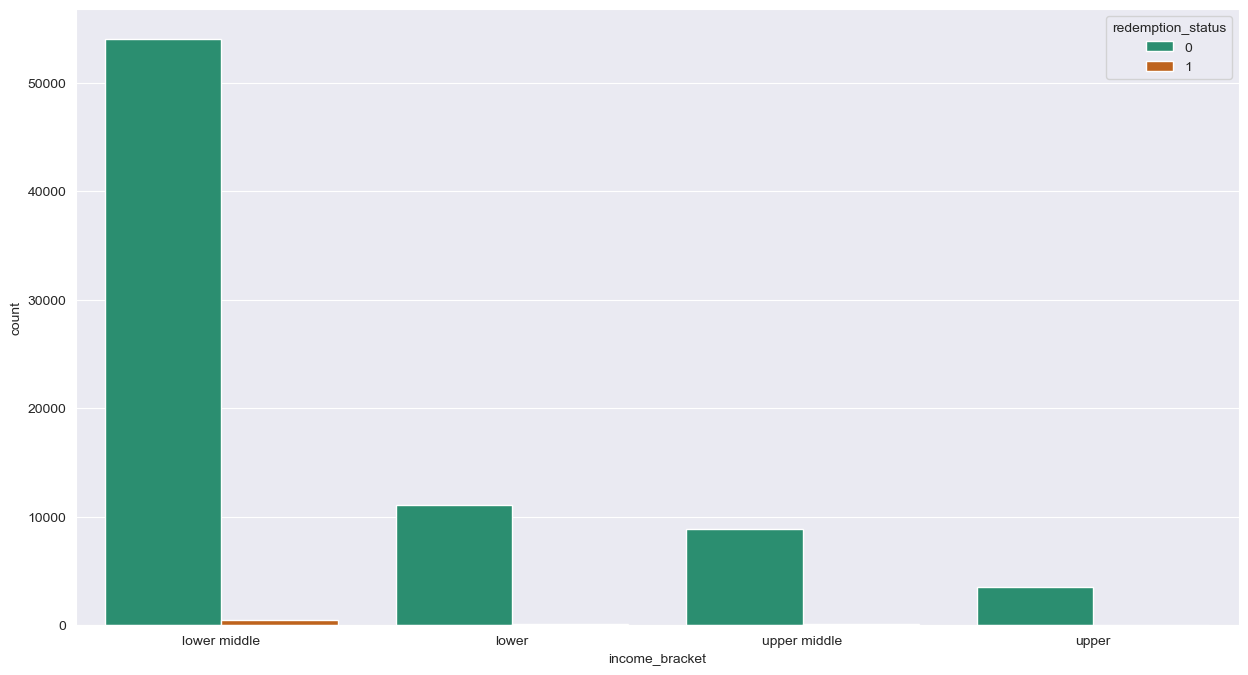

In [34]:
print(df.income_bracket.value_counts())
sns.countplot(df.income_bracket,hue=df.redemption_status,palette='Dark2')
# from the plot we can see lower middle class count is more in both redemption_status classes

<AxesSubplot:xlabel='campaign_type', ylabel='count'>

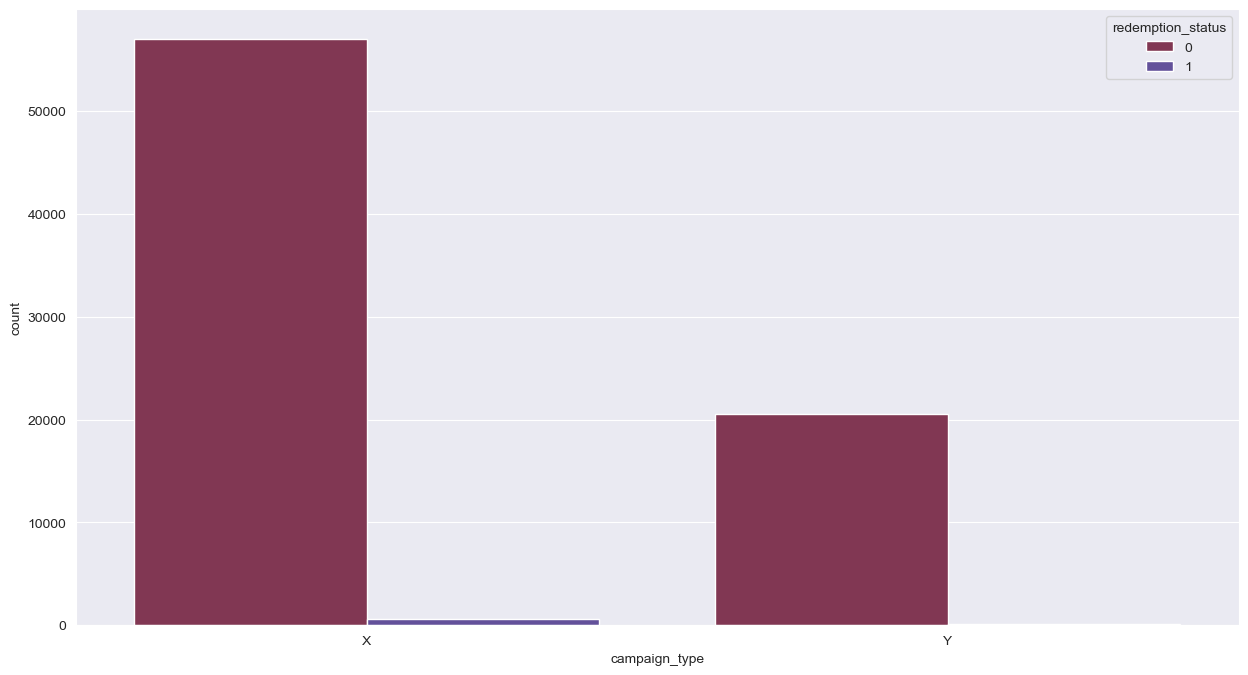

In [35]:
sns.countplot(df.campaign_type,hue=df.redemption_status,palette='twilight_r')
# we can see the redemption status is more in type 'X' campaign

In [36]:
df.income_bracket=df.income_bracket.map({'lower':0,'lower middle':1,'upper middle':2,'upper':3})

df.campaign_type=df.campaign_type.map({'X':0,'Y':1}).astype(int)

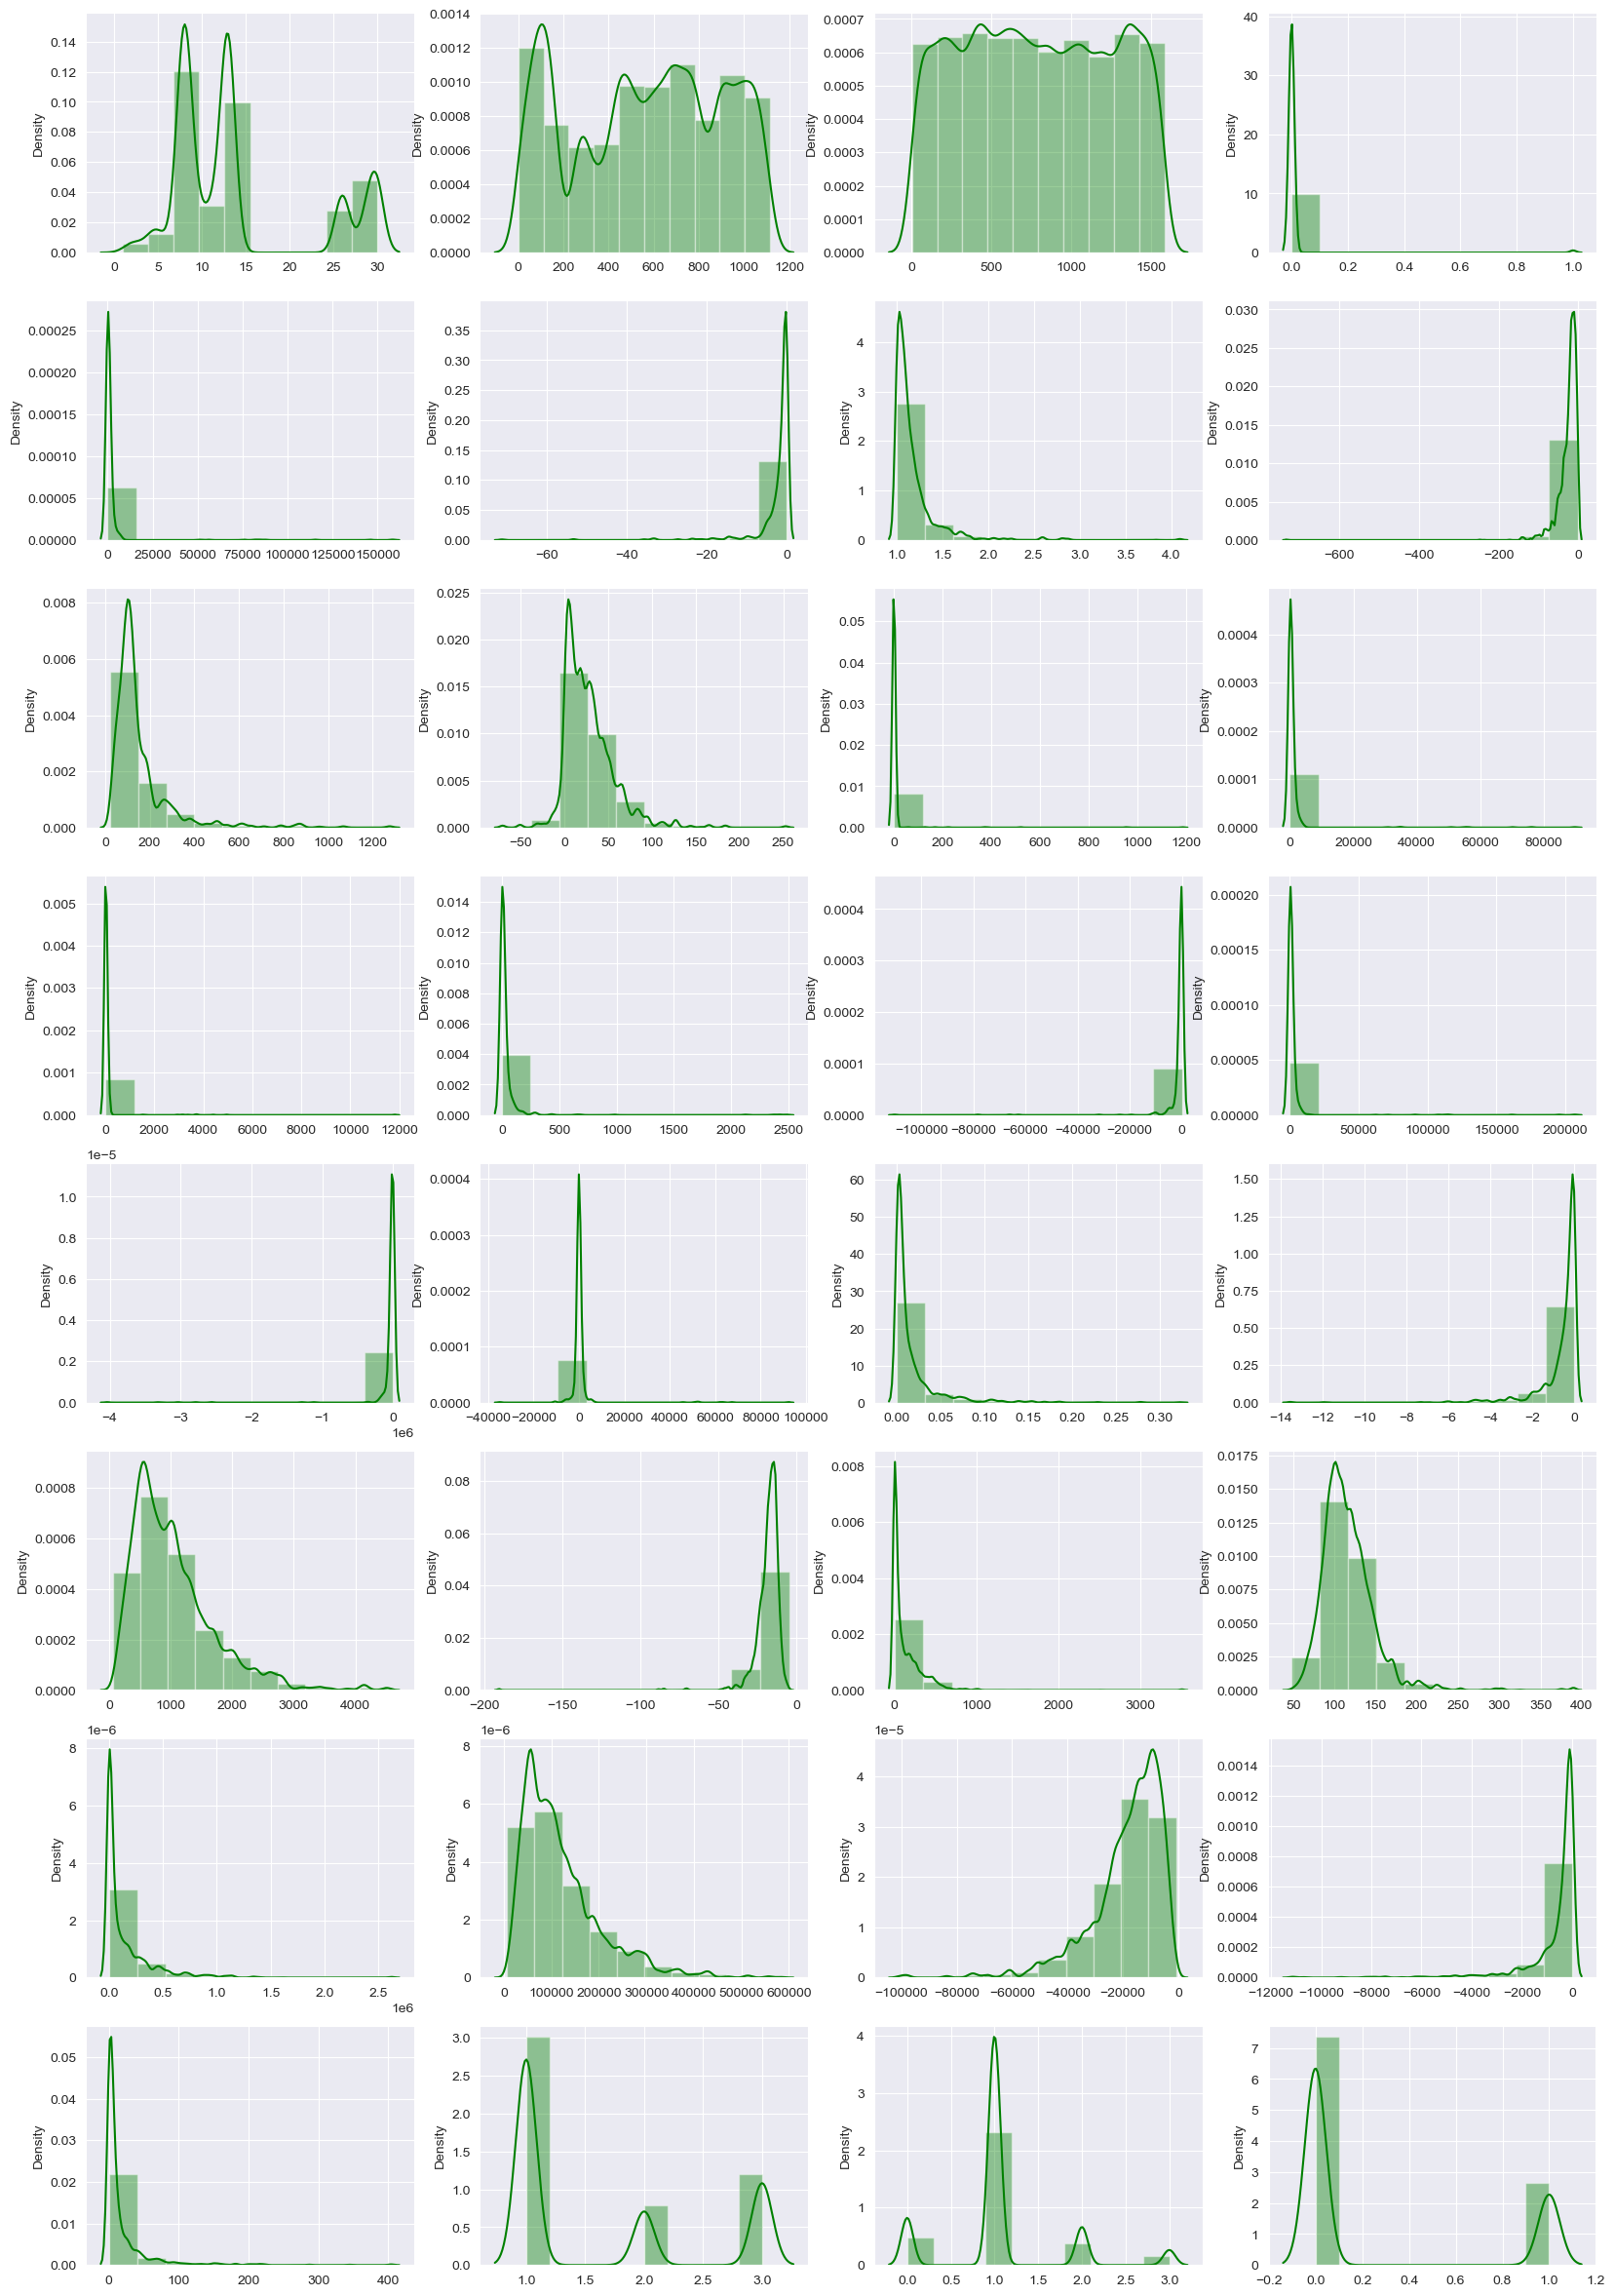

In [37]:
fig,ax=plt.subplots(8,4,figsize=(20,30))    
for i,subplots in zip(df.columns,ax.flatten()):
    sns.distplot(x=df[i],ax=subplots,bins=10,color='green')

## Hypothesis_Testing

- H0 : Variables are independent
- H1:  Variables are dependent

- **Assuming data is Normal and has Equal Variance**
- 95% confidence level , significance level 0.05

In [38]:
t,p=stats.f_oneway(df["redemption_status"],df["Trans_count"])
p < 0.05

True

In [39]:
t,p=stats.f_oneway(df["redemption_status"],df["avg_coup_dis"])
p < 0.05

True

In [40]:
t,p=stats.f_oneway(df["redemption_status"],df["avg_order_quantity"])
p < 0.05

True

In [41]:
t,p=stats.f_oneway(df["redemption_status"],df["avg_oth_dis"])
p < 0.05

True

In [42]:
t,p=stats.f_oneway(df["redemption_status"],df["avg_price"])
p < 0.05

True

In [43]:
t,p=stats.f_oneway(df["redemption_status"],df["avg_total_dis"])
p < 0.05

True

In [44]:
t,p=stats.f_oneway(df["redemption_status"],df["count_brands"])
p < 0.05

True

In [45]:
t,p=stats.f_oneway(df["redemption_status"],df["customer_count"])
p < 0.05

True

In [46]:
t,p=stats.f_oneway(df["redemption_status"],df["count_items"])
p < 0.05

True

In [47]:
t,p=stats.f_oneway(df["redemption_status"],df["sum_coup_count"])
p < 0.05

True

In [48]:
t,p=stats.f_oneway(df["redemption_status"],df["sum_coup_dis"])
p < 0.05

True

In [49]:
t,p=stats.f_oneway(df["redemption_status"],df["sum_order_quantity"])
p < 0.05

True

In [50]:
t,p=stats.f_oneway(df["redemption_status"],df["sum_oth_dis"])
p < 0.05

True

In [51]:
t,p=stats.f_oneway(df["redemption_status"],df["sum_total_dis"])
p < 0.05

True

In [52]:
t,p=stats.f_oneway(df["redemption_status"],df["avg_coup_count_cust"])
p < 0.05

True

In [53]:
t,p=stats.f_oneway(df["redemption_status"],df["avg_coup_disc_cust"])
p < 0.05

True

In [54]:
t,p=stats.f_oneway(df["redemption_status"],df["count_items_cust"])
p < 0.05

True

In [55]:
t,p=stats.f_oneway(df["redemption_status"],df["avg_oth_disc_cust"])
p < 0.05

True

In [56]:
t,p=stats.f_oneway(df["redemption_status"],df["avg_quantity_cust"])
p < 0.05

True

In [57]:
t,p=stats.f_oneway(df["redemption_status"],df["avg_price_cust"])
p < 0.05

True

In [58]:
t,p=stats.f_oneway(df["redemption_status"],df["sum_quantity_cust"])
p < 0.05

True

In [59]:
t,p=stats.f_oneway(df["redemption_status"],df["sum_price_cust"])
p < 0.05

True

In [60]:
t,p=stats.f_oneway(df["redemption_status"],df["sum_oth_disc_cust"])
p < 0.05

True

In [61]:
t,p=stats.f_oneway(df["redemption_status"],df["sum_coupp_disc_cust"])
p < 0.05

True

In [62]:
t,p=stats.f_oneway(df["redemption_status"],df["count_coup_used_cust"])
p < 0.05

True

In [63]:
t,p=stats.f_oneway(df["redemption_status"],df["duration"])
p < 0.05

True

In [64]:
stats.chi2_contingency(pd.crosstab(df["redemption_status"],df["age_range"]))
p=0.15125690202971068
p < 0.05

False

In [65]:
stats.chi2_contingency(pd.crosstab(df["redemption_status"],df["campaign_type"]))
p=6.793239027041997e-17
p < 0.05

True

In [66]:
stats.chi2_contingency(pd.crosstab(df["redemption_status"],df["income_bracket"]))
p= 0.0008482856914014823
p < 0.05

True

In [67]:
# we reject the null hypothesis as p val is less than significant value for this sample

- ## <u>**Scaling**</u>

In [68]:
df.head(10)

,campaign_id,coupon_id,customer_id,redemption_status,Trans_count,avg_coup_dis,avg_order_quantity,avg_oth_dis,avg_price,avg_total_dis,count_brands,customer_count,count_items,sum_coup_count,sum_coup_dis,sum_order_quantity,sum_oth_dis,sum_total_dis,avg_coup_count_cust,avg_coup_disc_cust,count_items_cust,avg_oth_disc_cust,avg_quantity_cust,avg_price_cust,sum_quantity_cust,sum_price_cust,sum_oth_disc_cust,sum_coupp_disc_cust,count_coup_used_cust,age_range,income_bracket,campaign_type,duration
0,13,27,1053,0,3701,-1.233750,1.169862,-51.747677,84.487938,28.374250,2,2403,125,185,-5221.70,4647.0,-225018.39,-1520.70,0.003226,-0.287258,310,-33.168935,340.487097,184.260484,105551.0,57120.75,-10282.37,-89.05,1.0,1,1,0,47
1,13,116,48,0,75,0.000000,1.050926,-10.661343,63.833519,25.000000,1,61,3,0,0.00,86.0,-684.27,75.00,0.031250,-3.223411,384,-27.577422,31.619792,234.625130,12142.0,90096.05,-10589.73,-1237.79,12.0,1,0,0,47
2,9,635,205,0,142,-2.987321,1.353802,-142.498493,332.128380,-0.867918,1,118,67,15,-605.54,202.0,-23566.35,-463.54,0.086687,-2.168421,969,-17.769174,1.392157,121.007730,1349.0,117256.49,-17218.33,-2101.20,84.0,1,2,1,32
3,13,644,1050,0,39,-4.452500,1.110390,-5.010601,94.261640,5.297500,1,14,4,1,-17.81,47.0,-309.91,21.19,0.008439,-0.751477,237,-16.655570,1.291139,98.276034,306.0,23291.42,-3947.37,-178.10,2.0,3,1,0,47
4,8,1017,1489,0,1414,-0.155422,1.070599,-33.614815,181.585793,44.032078,1,874,32,19,-427.44,1601.0,-54635.14,986.56,0.017794,-0.471548,562,-20.524733,247.443060,120.636103,139063.0,67797.49,-11534.90,-265.01,10.0,1,0,0,48
5,11,795,793,0,38,0.000000,1.150000,-36.890141,179.148154,2.923077,1,36,13,0,0.00,45.0,-1534.52,38.00,0.014569,-0.576847,1716,-18.879901,93.411422,146.326882,160294.0,251096.93,-32397.91,-989.87,25.0,1,1,1,46
6,9,444,590,0,320,-0.707661,1.121979,-41.791337,88.020242,22.149482,1,217,14,7,-320.58,385.0,-9848.07,-0.58,0.002336,-0.126223,1284,-18.279712,463.424455,140.377960,595037.0,180245.30,-23471.15,-162.07,3.0,1,0,1,32
7,29,538,368,0,201,-1.173727,1.551004,-15.553236,55.588575,21.159606,1,118,9,3,-64.11,301.0,-2913.06,136.89,0.001579,-0.040766,2534,-13.727297,78.288082,105.257948,198382.0,266723.64,-34784.97,-103.30,4.0,1,1,1,53
8,30,857,523,0,449,-0.169653,1.100951,-9.443836,49.863802,31.901776,2,319,14,7,-227.97,551.0,-4368.71,221.03,0.066116,-1.604298,242,-18.282438,1.801653,125.648471,436.0,30406.93,-4424.35,-388.24,16.0,2,1,0,46
9,2,559,679,0,1279,-1.020677,1.073705,-39.480554,266.019551,40.237388,1,771,31,64,-2172.78,1407.0,-51546.68,-893.78,0.000000,0.000000,1368,-16.625892,1.253655,114.893933,1715.0,157174.90,-22744.22,0.00,0.0,1,1,1,32


In [69]:
df.columns

Index(['campaign_id', 'coupon_id', 'customer_id', 'redemption_status',
       'Trans_count', 'avg_coup_dis', 'avg_order_quantity', 'avg_oth_dis',
       'avg_price', 'avg_total_dis', 'count_brands', 'customer_count',
       'count_items', 'sum_coup_count', 'sum_coup_dis', 'sum_order_quantity',
       'sum_oth_dis', 'sum_total_dis', 'avg_coup_count_cust',
       'avg_coup_disc_cust', 'count_items_cust', 'avg_oth_disc_cust',
       'avg_quantity_cust', 'avg_price_cust', 'sum_quantity_cust',
       'sum_price_cust', 'sum_oth_disc_cust', 'sum_coupp_disc_cust',
       'count_coup_used_cust', 'age_range', 'income_bracket', 'campaign_type',
       'duration'],
      dtype='object')

In [70]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scaled_data=pd.DataFrame(sc.fit_transform(df[[
      'avg_coup_dis', 'avg_order_quantity', 'avg_oth_dis',
       'avg_price', 'avg_total_dis',
      'sum_coup_count', 'sum_coup_dis', 'sum_order_quantity',
       'sum_oth_dis', 'sum_total_dis', 'avg_coup_count_cust',
       'avg_coup_disc_cust', 'avg_oth_disc_cust',
       'avg_quantity_cust', 'avg_price_cust', 'sum_quantity_cust',
       'sum_price_cust', 'sum_oth_disc_cust', 'sum_coupp_disc_cust',
        ]]),columns=[[
      'avg_coup_dis', 'avg_order_quantity', 'avg_oth_dis',
       'avg_price', 'avg_total_dis',
      'sum_coup_count', 'sum_coup_dis', 'sum_order_quantity',
       'sum_oth_dis', 'sum_total_dis', 'avg_coup_count_cust',
       'avg_coup_disc_cust', 'avg_oth_disc_cust',
       'avg_quantity_cust', 'avg_price_cust', 'sum_quantity_cust',
       'sum_price_cust', 'sum_oth_disc_cust', 'sum_coupp_disc_cust',
        ]])
df[[
      'avg_coup_dis', 'avg_order_quantity', 'avg_oth_dis',
       'avg_price', 'avg_total_dis',
      'sum_coup_count', 'sum_coup_dis', 'sum_order_quantity',
       'sum_oth_dis', 'sum_total_dis', 'avg_coup_count_cust',
       'avg_coup_disc_cust', 'avg_oth_disc_cust',
       'avg_quantity_cust', 'avg_price_cust', 'sum_quantity_cust',
       'sum_price_cust', 'sum_oth_disc_cust', 'sum_coupp_disc_cust',
        ]]=scaled_data
df.head()

,campaign_id,coupon_id,customer_id,redemption_status,Trans_count,avg_coup_dis,avg_order_quantity,avg_oth_dis,avg_price,avg_total_dis,count_brands,customer_count,count_items,sum_coup_count,sum_coup_dis,sum_order_quantity,sum_oth_dis,sum_total_dis,avg_coup_count_cust,avg_coup_disc_cust,count_items_cust,avg_oth_disc_cust,avg_quantity_cust,avg_price_cust,sum_quantity_cust,sum_price_cust,sum_oth_disc_cust,sum_coupp_disc_cust,count_coup_used_cust,age_range,income_bracket,campaign_type,duration
0,13,27,1053,0,3701,0.164788,-0.010760,-1.011630,-0.501553,0.021645,2,2403,125,0.737438,-0.577663,0.128629,-0.633549,-0.314947,-0.431699,0.291227,310,-1.731065,0.978395,2.166876,-0.147783,-0.755929,0.623848,0.450414,1.0,1,1,0,47
1,13,116,48,0,75,0.383703,-0.461510,0.519681,-0.651051,-0.097676,1,61,3,-0.199353,0.191987,-0.160749,0.154265,-0.090968,0.524750,-2.428940,384,-1.082558,-0.445789,3.764242,-0.534884,-0.352071,0.600119,-0.488031,12.0,1,0,0,47
2,9,635,205,0,142,-0.146363,0.686344,-4.393965,1.290882,-1.012424,1,118,67,-0.123397,0.102733,-0.153389,0.073908,-0.166559,2.416791,-1.451556,969,0.055008,-0.585169,0.160750,-0.579612,-0.019429,0.088371,-1.193381,84.0,1,2,1,32
3,13,644,1050,0,39,-0.406342,-0.236152,0.730287,-0.430811,-0.794401,1,14,4,-0.194289,0.189362,-0.163223,0.155580,-0.098521,-0.253782,-0.138843,237,0.184165,-0.585634,-0.560209,-0.583934,-1.170247,1.112929,0.377666,2.0,3,1,0,47
4,8,1017,1489,0,1414,0.356125,-0.386952,-0.335808,0.201246,0.575341,1,874,32,-0.103142,0.128984,-0.064628,-0.035199,0.036983,0.065491,0.120494,562,-0.264583,0.549370,0.148963,-0.008905,-0.625168,0.527149,0.306667,10.0,1,0,0,48


 - ## <u>**Splitting and Sampling**</u>

In [71]:
from sklearn.utils import resample

minority_class = df[df['redemption_status'] == 1]
majority_class = df[df['redemption_status'] == 0]

minority_class_upsampled = resample(minority_class, 
                                     replace=True,  # Sample with replacement
                                     n_samples=len(majority_class),  # Upsample to match majority class
                                     random_state=42)  # Set a random seed for reproducibility

df_upsampled = pd.concat([majority_class, minority_class_upsampled])

df_upsampled = df_upsampled.sample(frac=1, random_state=42).reset_index(drop=True)

In [72]:
df_upsampled.redemption_status.value_counts()

0    77640
1    77640
Name: redemption_status, dtype: int64

In [73]:
red_1 = df_upsampled[df_upsampled['redemption_status']==1]
red_0 = df_upsampled[df_upsampled['redemption_status']==0]

In [74]:
red_1 = red_1.iloc[:38000,:]

In [75]:
sampled_df =pd.concat([red_1,red_0],0)

0    0.671394
1    0.328606
Name: redemption_status, dtype: float64


<AxesSubplot:>

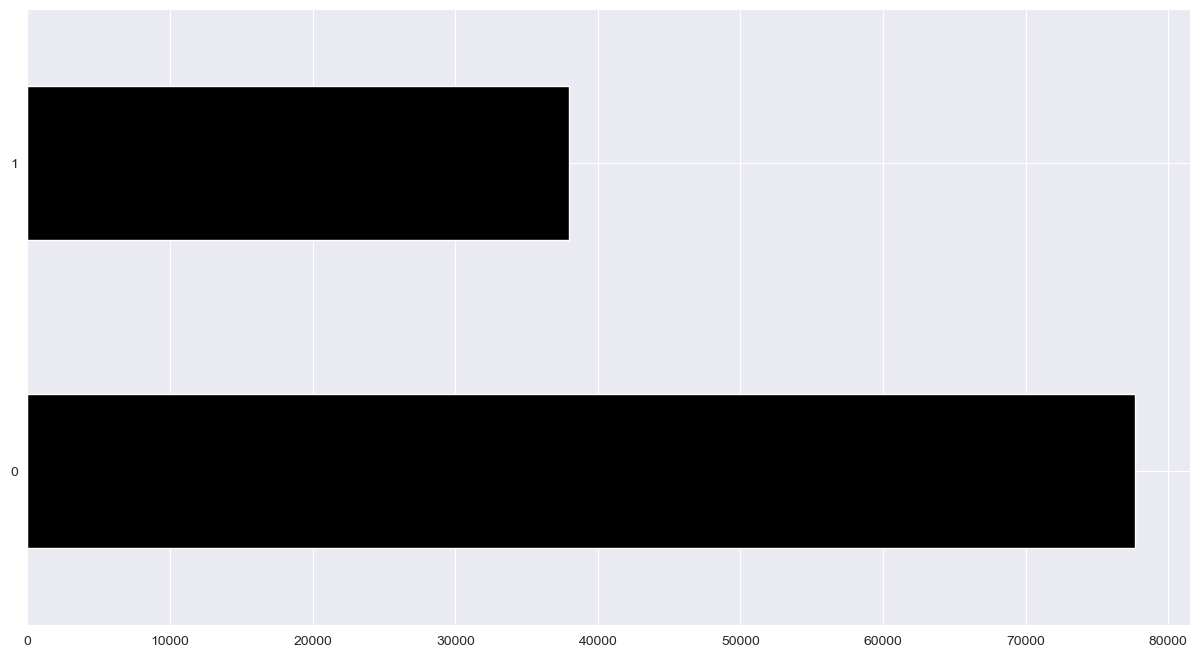

In [76]:
print(sampled_df.redemption_status.value_counts()/len(sampled_df))
sampled_df.redemption_status.value_counts().plot.barh(color='black')

In [77]:
sampled_df.reset_index(inplace=True)

In [78]:
sampled_df.drop('index',1,inplace=True)

In [79]:
sampled_df.head()

,campaign_id,coupon_id,customer_id,redemption_status,Trans_count,avg_coup_dis,avg_order_quantity,avg_oth_dis,avg_price,avg_total_dis,count_brands,customer_count,count_items,sum_coup_count,sum_coup_dis,sum_order_quantity,sum_oth_dis,sum_total_dis,avg_coup_count_cust,avg_coup_disc_cust,count_items_cust,avg_oth_disc_cust,avg_quantity_cust,avg_price_cust,sum_quantity_cust,sum_price_cust,sum_oth_disc_cust,sum_coupp_disc_cust,count_coup_used_cust,age_range,income_bracket,campaign_type,duration
0,13,468,585,1,4938,-0.289554,-0.317155,0.058937,-0.230596,0.389426,1,2949,116,1.289385,-1.314104,0.171900,-0.266411,-0.842631,-0.257382,-0.093215,840,0.040563,-0.340772,0.013084,-0.395848,-0.258508,0.257260,0.041277,7.0,1,1,0,47
1,13,987,1070,1,334,0.057878,-0.619583,0.315605,0.997394,-0.904366,1,250,83,-0.148715,0.126359,-0.144443,0.138042,-0.117110,3.052447,-2.292607,1073,0.662657,1.325588,1.024829,1.263652,0.492727,0.379712,-2.173392,113.0,2,2,0,47
2,8,661,243,1,925,-0.253868,-0.222144,-2.010288,0.839298,1.864847,2,560,11,0.575399,-0.592580,-0.104726,-0.090970,-0.718803,0.199301,0.044456,875,0.197882,0.126441,0.811652,-0.020537,0.061192,0.300540,0.127423,19.0,2,1,0,48
3,13,754,268,1,1854,-0.089051,-0.567195,-1.580293,-0.219852,-0.286050,1,1197,83,0.296893,-0.601580,-0.042866,-0.331984,-0.596975,0.173493,-0.303679,668,-0.341823,-0.533488,-1.596290,-0.550321,-0.918747,0.324839,0.015977,14.0,2,0,0,47
4,13,796,1506,1,5105,-0.124458,0.560252,0.296171,-0.459887,0.264191,1,2948,134,0.717183,-0.640517,0.271066,-0.054480,-0.177731,2.157002,-1.062539,822,-0.599791,1.268184,-0.637150,0.788753,-0.490554,-0.068255,-0.651001,65.0,1,1,0,47


In [80]:
# splitting the data training,validation and testing 
from sklearn.model_selection import train_test_split
x=sampled_df.drop(['redemption_status','customer_id'],1)
y=sampled_df.redemption_status
xtrain_resample,xtest,ytrain_resample,ytest=train_test_split(x,y,test_size=0.3,stratify=y)

In [81]:
df.head()

,campaign_id,coupon_id,customer_id,redemption_status,Trans_count,avg_coup_dis,avg_order_quantity,avg_oth_dis,avg_price,avg_total_dis,count_brands,customer_count,count_items,sum_coup_count,sum_coup_dis,sum_order_quantity,sum_oth_dis,sum_total_dis,avg_coup_count_cust,avg_coup_disc_cust,count_items_cust,avg_oth_disc_cust,avg_quantity_cust,avg_price_cust,sum_quantity_cust,sum_price_cust,sum_oth_disc_cust,sum_coupp_disc_cust,count_coup_used_cust,age_range,income_bracket,campaign_type,duration
0,13,27,1053,0,3701,0.164788,-0.010760,-1.011630,-0.501553,0.021645,2,2403,125,0.737438,-0.577663,0.128629,-0.633549,-0.314947,-0.431699,0.291227,310,-1.731065,0.978395,2.166876,-0.147783,-0.755929,0.623848,0.450414,1.0,1,1,0,47
1,13,116,48,0,75,0.383703,-0.461510,0.519681,-0.651051,-0.097676,1,61,3,-0.199353,0.191987,-0.160749,0.154265,-0.090968,0.524750,-2.428940,384,-1.082558,-0.445789,3.764242,-0.534884,-0.352071,0.600119,-0.488031,12.0,1,0,0,47
2,9,635,205,0,142,-0.146363,0.686344,-4.393965,1.290882,-1.012424,1,118,67,-0.123397,0.102733,-0.153389,0.073908,-0.166559,2.416791,-1.451556,969,0.055008,-0.585169,0.160750,-0.579612,-0.019429,0.088371,-1.193381,84.0,1,2,1,32
3,13,644,1050,0,39,-0.406342,-0.236152,0.730287,-0.430811,-0.794401,1,14,4,-0.194289,0.189362,-0.163223,0.155580,-0.098521,-0.253782,-0.138843,237,0.184165,-0.585634,-0.560209,-0.583934,-1.170247,1.112929,0.377666,2.0,3,1,0,47
4,8,1017,1489,0,1414,0.356125,-0.386952,-0.335808,0.201246,0.575341,1,874,32,-0.103142,0.128984,-0.064628,-0.035199,0.036983,0.065491,0.120494,562,-0.264583,0.549370,0.148963,-0.008905,-0.625168,0.527149,0.306667,10.0,1,0,0,48


In [82]:
len(df.columns)

33

## _Base Models_

- <u>LogisticRegression</u>

In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,recall_score,f1_score,precision_score,roc_auc_score,roc_curve
ypred_log=LogisticRegression().fit(xtrain_resample,ytrain_resample).predict(xtest)
print(accuracy_score(ytest,ypred_log))
print(roc_auc_score(ytest,ypred_log))
print(confusion_matrix(ytest,ypred_log))
print(classification_report(ytest,ypred_log))

accuracy=accuracy_score(ytest,ypred_log)
precision=precision_score(ytest,ypred_log)
recall=recall_score(ytest,ypred_log)
f1score=f1_score(ytest,ypred_log)
AUC=roc_auc_score(ytest,ypred_log)

result=pd.DataFrame(columns=['Model','Accuracy','Precision','Recall','F1_Score','AUC'])
data=pd.Series({'Model':'LogisticRegression','Accuracy':accuracy,'Precision':precision,'Recall':recall,'F1_Score':f1score,'AUC':AUC})
result=result.append(data,ignore_index=True)
result

0.7565144701948576
0.670787937127724
[[21449  1843]
 [ 6604  4796]]
              precision    recall  f1-score   support

           0       0.76      0.92      0.84     23292
           1       0.72      0.42      0.53     11400

    accuracy                           0.76     34692
   macro avg       0.74      0.67      0.68     34692
weighted avg       0.75      0.76      0.74     34692



,Model,Accuracy,Precision,Recall,F1_Score,AUC
0,LogisticRegression,0.756514,0.722398,0.420702,0.531737,0.670788


- **<u>_The recall/F1-scores are low, Hence the model is Bad_</u>**

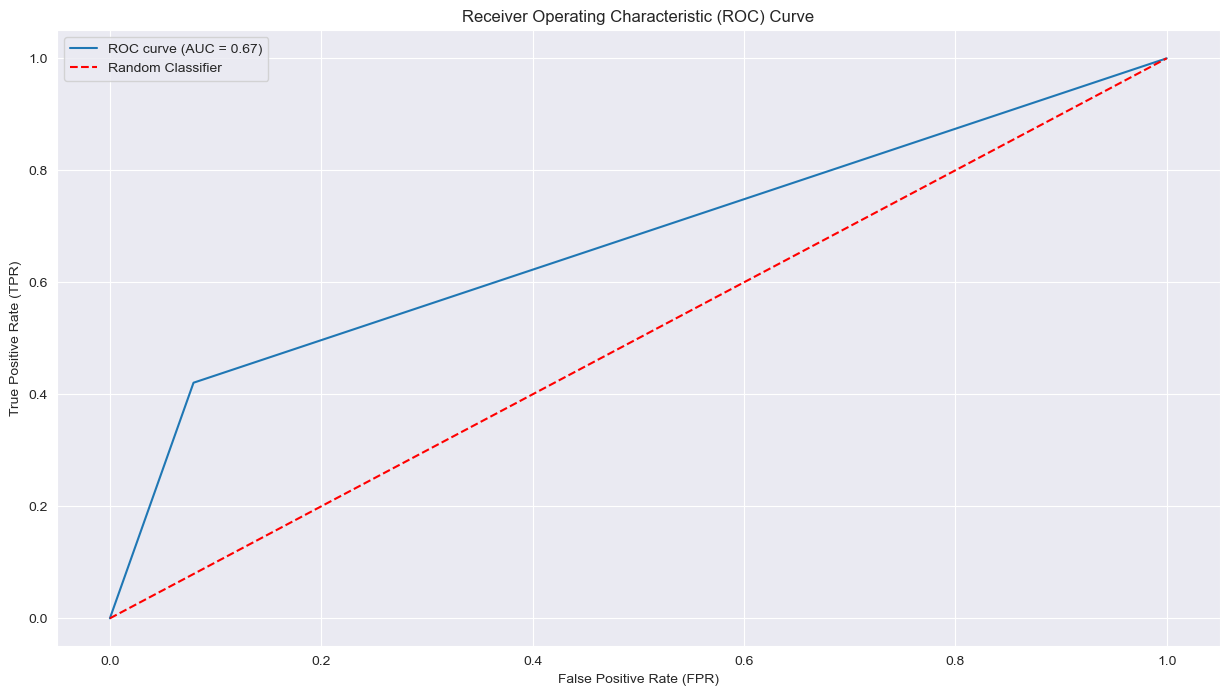

In [84]:
fpr, tpr, thresholds = roc_curve(ytest, ypred_log)
# Compute AUC-ROC score
auc = roc_auc_score(ytest, ypred_log)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'r--', label='Random Classifier')  # Plot random classifier for reference
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

- <u>DecisionTreeClassifier</u>

In [85]:
from sklearn.tree import DecisionTreeClassifier
ypred_dt=DecisionTreeClassifier().fit(xtrain_resample,ytrain_resample).predict(xtest)
print(accuracy_score(ytest,ypred_dt))
print(confusion_matrix(ytest,ypred_dt))
print(classification_report(ytest,ypred_dt))

accuracy=accuracy_score(ytest,ypred_dt)
precision=precision_score(ytest,ypred_dt)
recall=recall_score(ytest,ypred_dt)
f1score=f1_score(ytest,ypred_dt)
AUC=roc_auc_score(ytest,ypred_dt)

data=pd.Series({'Model':'DecisionTree','Accuracy':accuracy,'Precision':precision,'Recall':recall,'F1_Score':f1score,'AUC':AUC})
result=result.append(data,ignore_index=True)
result

0.9924190014989046
[[23029   263]
 [    0 11400]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     23292
           1       0.98      1.00      0.99     11400

    accuracy                           0.99     34692
   macro avg       0.99      0.99      0.99     34692
weighted avg       0.99      0.99      0.99     34692



,Model,Accuracy,Precision,Recall,F1_Score,AUC
0,LogisticRegression,0.756514,0.722398,0.420702,0.531737,0.670788
1,DecisionTree,0.992419,0.977450,1.000000,0.988596,0.994354


- **<u>_The Recall and accuracy Scores are very high, it performs well but might fail in future_</u>**
- **<u>_As the DecisionTree is a Greedy model it goes untill it gets the best scores_</u>**

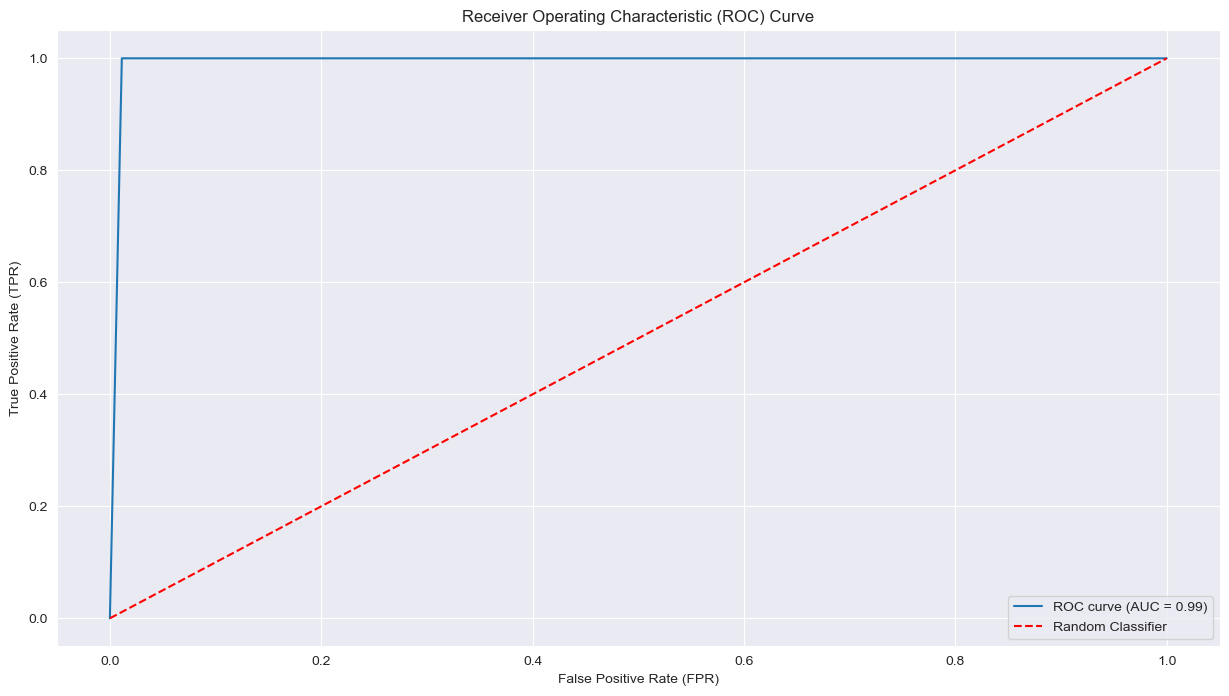

In [86]:
fpr, tpr, thresholds = roc_curve(ytest, ypred_dt)
# Compute AUC-ROC score
auc = roc_auc_score(ytest, ypred_dt)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'r--', label='Random Classifier')  # Plot random classifier for reference
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

- <u>RandomForestClassifier</u>

In [87]:
from sklearn.ensemble import RandomForestClassifier
ypred_rf=RandomForestClassifier().fit(xtrain_resample,ytrain_resample).predict(xtest)
print(accuracy_score(ytest,ypred_rf))
print(confusion_matrix(ytest,ypred_rf))
print(classification_report(ytest,ypred_rf))

accuracy=accuracy_score(ytest,ypred_rf)
precision=precision_score(ytest,ypred_rf)
recall=recall_score(ytest,ypred_rf)
f1score=f1_score(ytest,ypred_rf)
AUC=roc_auc_score(ytest,ypred_rf)

data=pd.Series({'Model':'RandomForest','Accuracy':accuracy,'Precision':precision,'Recall':recall,'F1_Score':f1score,'AUC':AUC})
result=result.append(data,ignore_index=True)
result

0.998328144817249
[[23234    58]
 [    0 11400]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     23292
           1       0.99      1.00      1.00     11400

    accuracy                           1.00     34692
   macro avg       1.00      1.00      1.00     34692
weighted avg       1.00      1.00      1.00     34692



,Model,Accuracy,Precision,Recall,F1_Score,AUC
0,LogisticRegression,0.756514,0.722398,0.420702,0.531737,0.670788
1,DecisionTree,0.992419,0.977450,1.000000,0.988596,0.994354
2,RandomForest,0.998328,0.994938,1.000000,0.997463,0.998755


- **<u>_The Recall and accuracy Scores are very high, it performs well but might fail in future_</u>**
- **<u>_As the RandomForest is certain number of DecisionTrees same happening here_</u>**

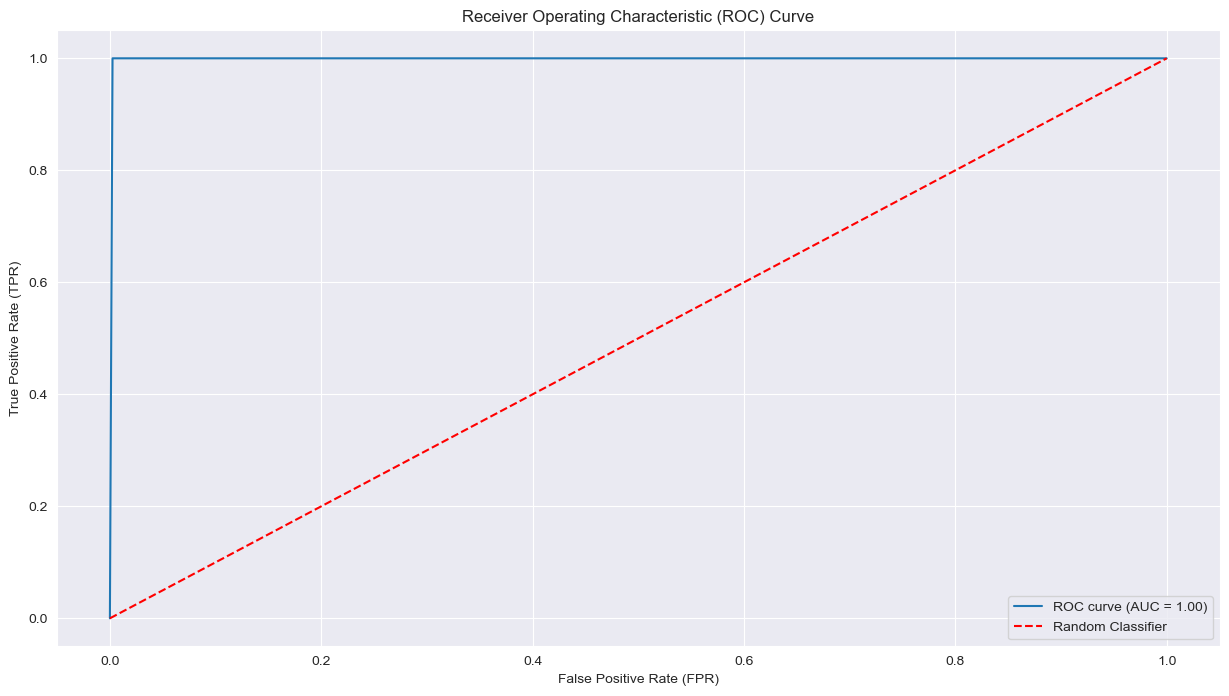

In [88]:
fpr, tpr, thresholds = roc_curve(ytest, ypred_rf)
# Compute AUC-ROC score
auc = roc_auc_score(ytest, ypred_rf)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'r--', label='Random Classifier')  # Plot random classifier for reference
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

- <u>HyperParameter Tuning</u>

In [89]:
from sklearn.model_selection import GridSearchCV
dt=DecisionTreeClassifier()
params=({'criterion':['gini','entropy'],
         'max_depth':[4,6,8,10,12],
         'min_samples_split':[50,100,150,200,250],
         'min_samples_leaf': [2,4,6,8]
})
gridsearchcv=GridSearchCV(dt,params,cv=5)
gridsearchcv.fit(xtrain_resample,ytrain_resample)
print(gridsearchcv.best_params_)
print(gridsearchcv.best_score_)

{'criterion': 'gini', 'max_depth': 12, 'min_samples_leaf': 2, 'min_samples_split': 50}
0.951845621770721


In [90]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion= 'entropy', max_depth= 12, min_samples_leaf= 2, min_samples_split= 50)
ypred_dt=dt.fit(xtrain_resample,ytrain_resample).predict(xtest)
print(accuracy_score(ytest,ypred_dt))
print(confusion_matrix(ytest,ypred_dt))
print(classification_report(ytest,ypred_dt))

accuracy=accuracy_score(ytest,ypred_dt)
precision   =precision_score(ytest,ypred_dt)
recall     =recall_score(ytest,ypred_dt)
f1score=f1_score(ytest,ypred_dt)
AUC=roc_auc_score(ytest,ypred_dt)

data=pd.Series({'Model':'DT-GridSearchCV','Accuracy':accuracy,'Precision':precision,'Recall':recall,'F1_Score':f1score,'AUC':AUC})
result=result.append(data,ignore_index=True)
result

0.9345670471578462
[[21069  2223]
 [   47 11353]]
              precision    recall  f1-score   support

           0       1.00      0.90      0.95     23292
           1       0.84      1.00      0.91     11400

    accuracy                           0.93     34692
   macro avg       0.92      0.95      0.93     34692
weighted avg       0.94      0.93      0.94     34692



,Model,Accuracy,Precision,Recall,F1_Score,AUC
0,LogisticRegression,0.756514,0.722398,0.420702,0.531737,0.670788
1,DecisionTree,0.992419,0.977450,1.000000,0.988596,0.994354
2,RandomForest,0.998328,0.994938,1.000000,0.997463,0.998755
3,DT-GridSearchCV,0.934567,0.836255,0.995877,0.909113,0.950218


- **<u>_After pruning the performance is improved and Auc is also more _</u>**

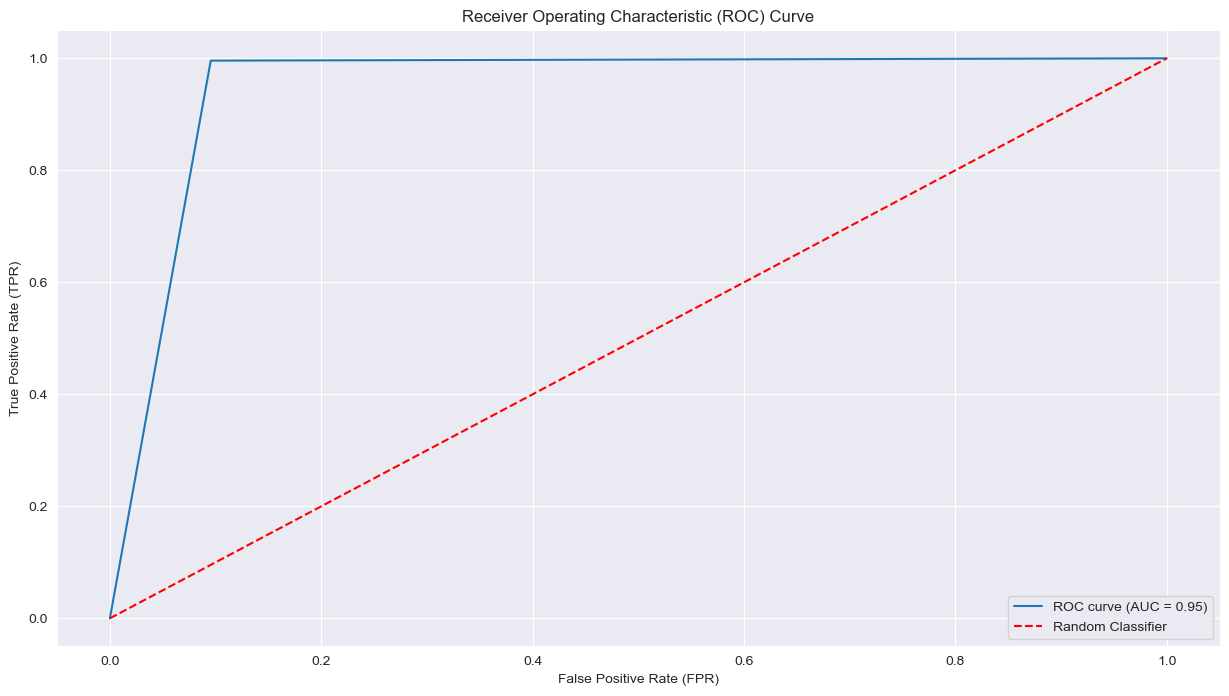

In [91]:
fpr, tpr, thresholds = roc_curve(ytest, ypred_dt)
# Compute AUC-ROC score
auc = roc_auc_score(ytest, ypred_dt)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'r--', label='Random Classifier')  # Plot random classifier for reference
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

- <u>AdaBoost</u>

In [92]:
from sklearn.ensemble import AdaBoostClassifier
ypred_ab=AdaBoostClassifier().fit(xtrain_resample,ytrain_resample).predict(xtest)
print(accuracy_score(ytest,ypred_ab))
print(confusion_matrix(ytest,ypred_ab))
print(classification_report(ytest,ypred_ab))

accuracy=accuracy_score(ytest,ypred_ab)
precision=precision_score(ytest,ypred_ab)
recall=recall_score(ytest,ypred_ab)
f1score=f1_score(ytest,ypred_ab)
AUC=roc_auc_score(ytest,ypred_ab)

data=pd.Series({'Model':'AdaBoost','Accuracy':accuracy,'Precision':precision,'Recall':recall,'F1_Score':f1score,'AUC':AUC})
result=result.append(data,ignore_index=True)
result

0.8674334140435835
[[20856  2436]
 [ 2163  9237]]
              precision    recall  f1-score   support

           0       0.91      0.90      0.90     23292
           1       0.79      0.81      0.80     11400

    accuracy                           0.87     34692
   macro avg       0.85      0.85      0.85     34692
weighted avg       0.87      0.87      0.87     34692



,Model,Accuracy,Precision,Recall,F1_Score,AUC
0,LogisticRegression,0.756514,0.722398,0.420702,0.531737,0.670788
1,DecisionTree,0.992419,0.977450,1.000000,0.988596,0.994354
2,RandomForest,0.998328,0.994938,1.000000,0.997463,0.998755
3,DT-GridSearchCV,0.934567,0.836255,0.995877,0.909113,0.950218
4,AdaBoost,0.867433,0.791313,0.810263,0.800676,0.852839


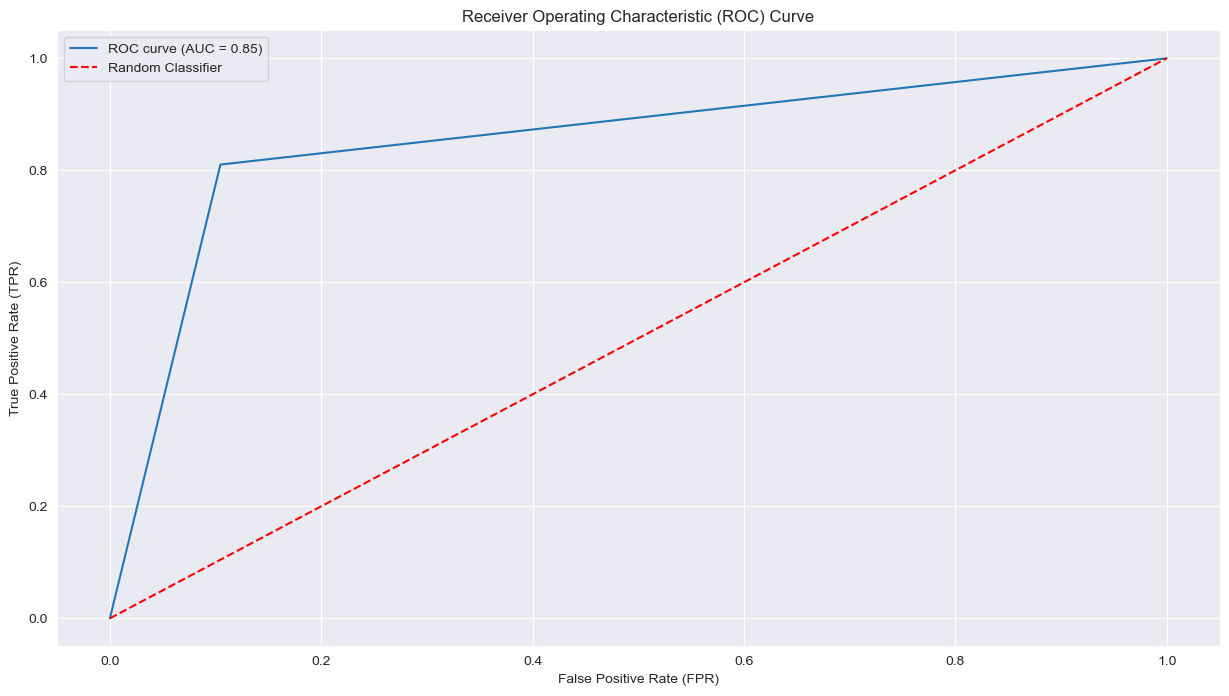

In [93]:
fpr, tpr, thresholds = roc_curve(ytest, ypred_ab)
# Compute AUC-ROC score
auc = roc_auc_score(ytest, ypred_ab)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'r--', label='Random Classifier')  # Plot random classifier for reference
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [94]:
ad=AdaBoostClassifier()
tuned_params =[{'n_estimators':[100,150,200],'learning_rate':[0.2,0.3,0.4,0.5,0.6]}]
ad_tuned= GridSearchCV(estimator=ad,param_grid=tuned_params,cv=2,n_jobs=-1)
ad_tuned.fit(xtrain_resample,ytrain_resample)

GridSearchCV(cv=2, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid=[{'learning_rate': [0.2, 0.3, 0.4, 0.5, 0.6],
                          'n_estimators': [100, 150, 200]}])

In [95]:
ad_tuned.best_params_

{'learning_rate': 0.6, 'n_estimators': 200}

In [96]:
ypred_ab=AdaBoostClassifier(learning_rate= 0.6, n_estimators= 200).fit(xtrain_resample,ytrain_resample).predict(xtest)
print(accuracy_score(ytest,ypred_ab))
print(confusion_matrix(ytest,ypred_ab))
print(classification_report(ytest,ypred_ab))

accuracy=accuracy_score(ytest,ypred_ab)
precision=precision_score(ytest,ypred_ab)
recall=recall_score(ytest,ypred_ab)
f1score=f1_score(ytest,ypred_ab)
AUC=roc_auc_score(ytest,ypred_ab)

data=pd.Series({'Model':'AdaBoost-Tuned','Accuracy':accuracy,'Precision':precision,'Recall':recall,'F1_Score':f1score,'AUC':AUC})
result=result.append(data,ignore_index=True)
result

0.8843825665859564
[[21075  2217]
 [ 1794  9606]]
              precision    recall  f1-score   support

           0       0.92      0.90      0.91     23292
           1       0.81      0.84      0.83     11400

    accuracy                           0.88     34692
   macro avg       0.87      0.87      0.87     34692
weighted avg       0.89      0.88      0.88     34692



,Model,Accuracy,Precision,Recall,F1_Score,AUC
0,LogisticRegression,0.756514,0.722398,0.420702,0.531737,0.670788
1,DecisionTree,0.992419,0.977450,1.000000,0.988596,0.994354
2,RandomForest,0.998328,0.994938,1.000000,0.997463,0.998755
3,DT-GridSearchCV,0.934567,0.836255,0.995877,0.909113,0.950218
4,AdaBoost,0.867433,0.791313,0.810263,0.800676,0.852839
5,AdaBoost-Tuned,0.884383,0.812484,0.842632,0.827283,0.873724


- **<u>_Adaboost-Tuned is perfoming better than normal Adaboost model_<u/>**

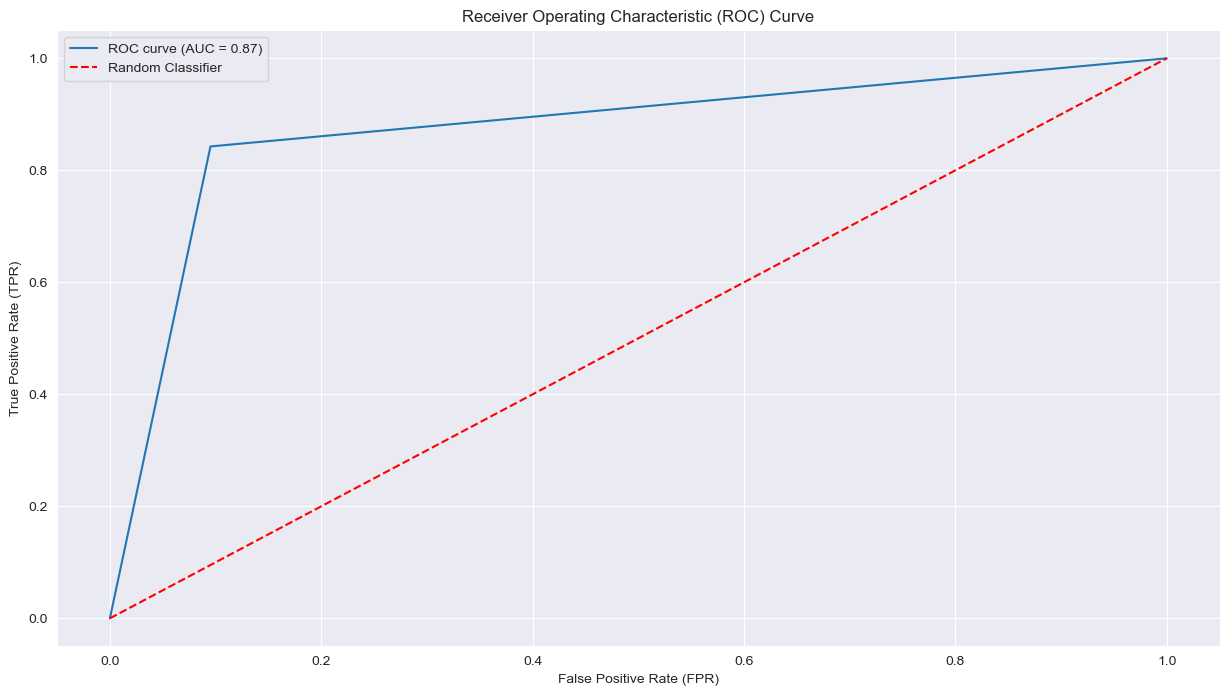

In [97]:
fpr, tpr, thresholds = roc_curve(ytest, ypred_ab)
# Compute AUC-ROC score
auc = roc_auc_score(ytest, ypred_ab)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'r--', label='Random Classifier')  # Plot random classifier for reference
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

- <u>Feature Importance</u>

In [98]:
dt=DecisionTreeClassifier()
dt.fit(xtrain_resample,ytrain_resample).predict(xtest)
imp_featu=pd.DataFrame()
imp_featu['Variables']=xtrain_resample.columns
imp_featu['Values']=dt.feature_importances_
imp_featu.sort_values(by='Values',ascending=False)

,Variables,Values
26,count_coup_used_cust,0.316013
11,sum_coup_count,0.159459
3,avg_coup_dis,0.045905
19,avg_oth_disc_cust,0.035471
16,avg_coup_count_cust,0.034634
25,sum_coupp_disc_cust,0.032740
29,campaign_type,0.032475
20,avg_quantity_cust,0.031773
23,sum_price_cust,0.025708
15,sum_total_dis,0.024884


In [99]:
from sklearn.ensemble import GradientBoostingClassifier
ypred_gbc=GradientBoostingClassifier().fit(xtrain_resample,ytrain_resample).predict(xtest)
print(accuracy_score(ytest,ypred_gbc))
print(confusion_matrix(ytest,ypred_gbc))
print(classification_report(ytest,ypred_gbc))

accuracy=accuracy_score(ytest,ypred_gbc)
precision=precision_score(ytest,ypred_gbc)
recall=recall_score(ytest,ypred_gbc)
f1score=f1_score(ytest,ypred_gbc)
AUC=roc_auc_score(ytest,ypred_gbc)

data=pd.Series({'Model':'GradientBoosting','Accuracy':accuracy,'Precision':precision,'Recall':recall,'F1_Score':f1score,'AUC':AUC})
result=result.append(data,ignore_index=True)
result

0.899948114839156
[[21321  1971]
 [ 1500  9900]]
              precision    recall  f1-score   support

           0       0.93      0.92      0.92     23292
           1       0.83      0.87      0.85     11400

    accuracy                           0.90     34692
   macro avg       0.88      0.89      0.89     34692
weighted avg       0.90      0.90      0.90     34692



,Model,Accuracy,Precision,Recall,F1_Score,AUC
0,LogisticRegression,0.756514,0.722398,0.420702,0.531737,0.670788
1,DecisionTree,0.992419,0.977450,1.000000,0.988596,0.994354
2,RandomForest,0.998328,0.994938,1.000000,0.997463,0.998755
3,DT-GridSearchCV,0.934567,0.836255,0.995877,0.909113,0.950218
4,AdaBoost,0.867433,0.791313,0.810263,0.800676,0.852839
5,AdaBoost-Tuned,0.884383,0.812484,0.842632,0.827283,0.873724
6,GradientBoosting,0.899948,0.833965,0.868421,0.850844,0.891900
